# Futuros Países Desarrollados
**Alejandra Marín Villavicencio 21.321.206-0**

**Maximiliano Parada Díaz 21.208.645-2**

**Josefa Suzarte Lobos 21.108.122-8**
# 1. Introducción
Este proyecto consiste en realizar un análisis y comparación de países europeos con los países del cono sur de América. Esto se logrará a través mediante la implementación de un método no supervisado específicamente un proceso de clustering, al que posteriormente se le aplica un modelo ARIMA a cada cluster creado.

Para la realización de este proyecto, en primer lugar se debe realizar un trabajo de pre-procesamiento de datos, dado que el dataset que posee este trabajo no cumple con las condiciones necesarias iniciales para poder aplicar directamente los modelos mencionados.

# 2. Pre-Procesamiento
En el siguiente código, se carga nuestra base de datos y se muestra por pantalla las primeras 5 filas. La cual contiene 20 atributos y 1500 filas, dentro de los principales atributos, son el crecimiento del PIB per capita, Expectativa de vida, Nivel de pobreza y Tasa de desempleo.

In [ ]:
from google.colab import files
import numpy as np
import pandas as pd

uploaded = files.upload()

# Try using a different delimiter (e.g., semicolon)
dataset = pd.read_csv('Data.csv', sep=';')

# Or try to automatically detect the delimiter
#dataset = pd.read_csv('DATA.csv', sep=None, engine='python')

dataset.head()

Saving Data.csv to Data (1).csv


,Country Name,Time,General government final consumption expenditure (% of GDP) [NE.CON.GOVT.ZS],Progression to secondary school (%) [SE.SEC.PROG.ZS],"School enrollment, secondary (% gross) [SE.SEC.ENRR]","School enrollment, secondary (% net) [SE.SEC.NENR]","School enrollment, tertiary (% gross) [SE.TER.ENRR]",Present value of external debt (% of GNI) [DT.DOD.PVLX.GN.ZS],GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG],GDP per capita (current US$) [NY.GDP.PCAP.CD],...,"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS],Multidimensional poverty headcount ratio (World Bank) (% of population) [SI.POV.MPWB],"Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]",Expense (% of GDP) [GC.XPN.TOTL.GD.ZS],Tax revenue (% of GDP) [GC.TAX.TOTL.GD.ZS],"Taxes on income, profits and capital gains (% of total taxes) [GC.TAX.YPKG.ZS]",Control of Corruption: Percentile Rank [CC.PER.RNK],Government Effectiveness: Percentile Rank [GE.PER.RNK],"Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]"
0,Argentina,1974,"13,15323273","29,05048","52,76239014","40,49867","22,88301086",NaN,"3,754159661",NaN,...,"66,563",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3,4"
1,Argentina,1975,"12,58917764",NaN,"54,38755035","41,97323","27,07715988",NaN,"-1,673528395",NaN,...,"67,081",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,3"
2,Argentina,1976,"9,420094728",NaN,"55,88048172",NaN,"27,01173973",NaN,"-3,563802521",NaN,...,"67,228",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4,5"
3,Argentina,1977,"9,015409977",NaN,"55,62667847",NaN,"23,96474075",NaN,"5,238802842",NaN,...,"67,861",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,8"
4,Argentina,1978,"11,16611167",NaN,"55,34373093",NaN,"21,25099945",NaN,"-6,027002039",NaN,...,"68,197",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,8"


Para conocer aprofundidad nuestro dataset, realizamos el siguiente código de forma de conocer el tipo de dato que almacena cada atributo y la cantidad de datos que contiene.


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column                                                                                 Non-Null Count  Dtype 
---  ------                                                                                 --------------  ----- 
 0   Country Name                                                                           1500 non-null   object
 1   Time                                                                                   1500 non-null   int64 
 2   General government final consumption expenditure (% of GDP) [NE.CON.GOVT.ZS]           1363 non-null   object
 3   Progression to secondary school (%) [SE.SEC.PROG.ZS]                                   488 non-null    object
 4   School enrollment, secondary (% gross) [SE.SEC.ENRR]                                   1245 non-null   object
 5   School enrollment, secondary (% net) [SE.SEC.NENR]                                 

Dado que los datos presentan una separación por ',' se hace díficil que las funciones capten los datos. Es por esto que se crea un código capaz de cambiar todas las "," por ".", este código solo se aplica para un atributo en específico, y posteriormente se aplicara a toda la base de datos.

In [ ]:
copy = dataset.copy()

new_df = dataset['General government final consumption expenditure (% of GDP) [NE.CON.GOVT.ZS]']
new_df = pd.DataFrame(new_df)
new_df.head()

print(new_df.columns)
new_df.columns = new_df.columns.str.strip()
print(new_df.columns)

new_df['General government final consumption expenditure (% of GDP) [NE.CON.GOVT.ZS]'] = new_df['General government final consumption expenditure (% of GDP) [NE.CON.GOVT.ZS]'].str.replace(',', '.')

new_df['General government final consumption expenditure (% of GDP) [NE.CON.GOVT.ZS]'] = new_df['General government final consumption expenditure (% of GDP) [NE.CON.GOVT.ZS]'].astype(float)

new_df.head()

Index(['General government final consumption expenditure (% of GDP) [NE.CON.GOVT.ZS]'], dtype='object')
Index(['General government final consumption expenditure (% of GDP) [NE.CON.GOVT.ZS]'], dtype='object')


,General government final consumption expenditure (% of GDP) [NE.CON.GOVT.ZS]
0,13.153233
1,12.589178
2,9.420095
3,9.015410
4,11.166112


A continuación se realiza el cambio a toda la base de datos, recorriendo por columna, excluyendo las columnas de Country Name y Time, dado el tipo de dato que almacenan como lo es un String (Nombre del País) y un año el cual debe ser tomado con cuidado ya que no es un atributo de razón, si no que es un intervalo.

In [ ]:

columnas_a_convertir = [col for col in copy.columns if col != 'Country Name' and col != 'Time']
print(columnas_a_convertir)

for columna in columnas_a_convertir:
  dataset[columna] = dataset[columna].str.replace(",",".")
  dataset[columna] = dataset[columna].astype(float)



dataset.head()


['General government final consumption expenditure (% of GDP) [NE.CON.GOVT.ZS]', 'Progression to secondary school (%) [SE.SEC.PROG.ZS]', 'School enrollment, secondary (% gross) [SE.SEC.ENRR]', 'School enrollment, secondary (% net) [SE.SEC.NENR]', 'School enrollment, tertiary (% gross) [SE.TER.ENRR]', 'Present value of external debt (% of GNI) [DT.DOD.PVLX.GN.ZS]', 'GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG]', 'GDP per capita (current US$) [NY.GDP.PCAP.CD]', 'GDP (current US$) [NY.GDP.MKTP.CD]', 'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]', 'Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]', 'Multidimensional poverty headcount ratio (World Bank) (% of population) [SI.POV.MPWB]', 'Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]', 'Expense (% of GDP) [GC.XPN.TOTL.GD.ZS]', 'Tax revenue (% of GDP) [GC.TAX.TOTL.GD.ZS]', 'Taxes on income, profits and capital gains (% of total taxes) [GC.TAX.YPKG.ZS]', 'Control of Corruption: Percentile Rank [CC.P

,Country Name,Time,General government final consumption expenditure (% of GDP) [NE.CON.GOVT.ZS],Progression to secondary school (%) [SE.SEC.PROG.ZS],"School enrollment, secondary (% gross) [SE.SEC.ENRR]","School enrollment, secondary (% net) [SE.SEC.NENR]","School enrollment, tertiary (% gross) [SE.TER.ENRR]",Present value of external debt (% of GNI) [DT.DOD.PVLX.GN.ZS],GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG],GDP per capita (current US$) [NY.GDP.PCAP.CD],...,"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS],Multidimensional poverty headcount ratio (World Bank) (% of population) [SI.POV.MPWB],"Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]",Expense (% of GDP) [GC.XPN.TOTL.GD.ZS],Tax revenue (% of GDP) [GC.TAX.TOTL.GD.ZS],"Taxes on income, profits and capital gains (% of total taxes) [GC.TAX.YPKG.ZS]",Control of Corruption: Percentile Rank [CC.PER.RNK],Government Effectiveness: Percentile Rank [GE.PER.RNK],"Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]"
0,Argentina,1974,13.153233,29.05048,52.762390,40.49867,22.883011,NaN,3.754160,NaN,...,66.563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.4
1,Argentina,1975,12.589178,NaN,54.387550,41.97323,27.077160,NaN,-1.673528,NaN,...,67.081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3
2,Argentina,1976,9.420095,NaN,55.880482,NaN,27.011740,NaN,-3.563803,NaN,...,67.228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5
3,Argentina,1977,9.015410,NaN,55.626678,NaN,23.964741,NaN,5.238803,NaN,...,67.861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.8
4,Argentina,1978,11.166112,NaN,55.343731,NaN,21.250999,NaN,-6.027002,NaN,...,68.197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.8


Como se observa en el siguiente código, el tipo de dato que contienen los atributos cambiaron, pasaron de ser objetos (String) a ser de tipo numérico (Float). Esto permite que los datos se encuentren en un tipo capaz de ser trabajados por funciones.


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Country Name                                                                           1500 non-null   object 
 1   Time                                                                                   1500 non-null   int64  
 2   General government final consumption expenditure (% of GDP) [NE.CON.GOVT.ZS]           1363 non-null   float64
 3   Progression to secondary school (%) [SE.SEC.PROG.ZS]                                   488 non-null    float64
 4   School enrollment, secondary (% gross) [SE.SEC.ENRR]                                   1245 non-null   float64
 5   School enrollment, secondary (% net) [SE.SEC.NENR]                          

Para seguir ampliando el conocimiento de nuestro dataset, se aplica la función .describe, la cual nos muestra medidas de estadística descriptiva, lo cual permite conocer los rangos por cada atributo.

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,1500.0,1.998500e+03,1.443568e+01,1.974000e+03,1.986000e+03,1.998500e+03,2.011000e+03,2.023000e+03
General government final consumption expenditure (% of GDP) [NE.CON.GOVT.ZS],1363.0,1.747410e+01,5.145388e+00,2.975538e+00,1.311011e+01,1.825445e+01,2.117667e+01,3.147466e+01
Progression to secondary school (%) [SE.SEC.PROG.ZS],488.0,9.336532e+01,1.127011e+01,2.905048e+01,9.273864e+01,9.823906e+01,9.976854e+01,1.000000e+02
"School enrollment, secondary (% gross) [SE.SEC.ENRR]",1245.0,9.397530e+01,2.518777e+01,1.945684e+01,8.172329e+01,9.810637e+01,1.082818e+02,1.640798e+02
"School enrollment, secondary (% net) [SE.SEC.NENR]",673.0,8.291078e+01,1.280159e+01,2.304631e+01,7.742430e+01,8.617291e+01,9.249466e+01,9.983487e+01
"School enrollment, tertiary (% gross) [SE.TER.ENRR]",1111.0,4.408060e+01,2.560086e+01,2.226710e+00,2.368108e+01,3.827970e+01,6.371866e+01,1.502018e+02
Present value of external debt (% of GNI) [DT.DOD.PVLX.GN.ZS],8.0,2.092438e+01,9.697218e+00,8.842518e+00,1.248145e+01,1.983245e+01,2.972175e+01,3.457107e+01
GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG],1477.0,1.703710e+00,4.162753e+00,-1.691141e+01,1.115890e-01,1.854643e+00,3.553548e+00,6.259935e+01
GDP per capita (current US$) [NY.GDP.PCAP.CD],1458.0,2.220517e+04,2.608445e+04,4.191062e+02,4.132117e+03,1.253082e+04,3.157306e+04,1.975045e+05
GDP (current US$) [NY.GDP.MKTP.CD],1458.0,4.239673e+11,7.233963e+11,1.939805e+08,2.447848e+10,1.332225e+11,4.268535e+11,4.456080e+12


Se decide eliminar la columna de % Bruto de inscripción a la Secundaria, debido a que toma a todos los inscritos sin diferenciar por edad, además se elimina la columna de Deuda Externa debido a que posee muy pocos datos.



Todas las demás columnas son rellenadas con las medianas correspondientes, dado que aportan valor e información necesaria para nuestra investigación. Además se reescriben algunos datos de la columna '% Bruto inscripción a la educación superior' dado que presenta datos sobre el 100%, agregar que no se cambian los valores de la columna de "Deuda del Gobierno central" los cuales también presentan porcetaje mayores a 100 pero esto lleva relación con que los paises son capaces de mantener una deuda mayor a la de PIB, dado que esto depende de si es que es fondos internacionales permiten la obtención de crédito



In [ ]:
#Eliminación de Columnas
dataset.drop(columns= "School enrollment, secondary (% gross) [SE.SEC.ENRR]", inplace=True)
dataset.drop(columns= "Present value of external debt (% of GNI) [DT.DOD.PVLX.GN.ZS]", inplace=True)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Country Name                                                                           1500 non-null   object 
 1   Time                                                                                   1500 non-null   int64  
 2   General government final consumption expenditure (% of GDP) [NE.CON.GOVT.ZS]           1363 non-null   float64
 3   Progression to secondary school (%) [SE.SEC.PROG.ZS]                                   488 non-null    float64
 4   School enrollment, secondary (% net) [SE.SEC.NENR]                                     673 non-null    float64
 5   School enrollment, tertiary (% gross) [SE.TER.ENRR]                         

Dada la longitud y complejidad de los nombres de los atributos, se opta por cambiar los nombres a sus símiles en español, además permite que el entendimiento de cada atributo no requiera el conocimiento de otro idioma.


In [ ]:
dataset.columns= ['Pais','Año', 'Gasto Gobierno','Promocion a Secundaria','Inscripcion a Secundaria','Inscripcion a Superior','Crecimiento PIB per capita','PIB per capita','PIB','Esperanza de vida','Gasto en Salud','Pobreza Multidimensional','Deuda del Gobierno','Gasto Fiscal','Ingreso por Impuestos','Impuestos a la renta','Control de Corrupcion','Efectividad del Gobierno','Desempleo']

dataset.head()

,Pais,Año,Gasto Gobierno,Promocion a Secundaria,Inscripcion a Secundaria,Inscripcion a Superior,Crecimiento PIB per capita,PIB per capita,PIB,Esperanza de vida,Gasto en Salud,Pobreza Multidimensional,Deuda del Gobierno,Gasto Fiscal,Ingreso por Impuestos,Impuestos a la renta,Control de Corrupcion,Efectividad del Gobierno,Desempleo
0,Argentina,1974,13.153233,29.05048,40.49867,22.883011,3.754160,NaN,NaN,66.563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.4
1,Argentina,1975,12.589178,NaN,41.97323,27.077160,-1.673528,NaN,NaN,67.081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3
2,Argentina,1976,9.420095,NaN,NaN,27.011740,-3.563803,NaN,NaN,67.228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5
3,Argentina,1977,9.015410,NaN,NaN,23.964741,5.238803,NaN,NaN,67.861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.8
4,Argentina,1978,11.166112,NaN,NaN,21.250999,-6.027002,NaN,NaN,68.197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.8


Debido a la ausencia de datos como se mencionó anteriormente, se decide rellenar los atributos por media y mediana, dependiendo del tipo de atributo. Esto permite que los datos sean rellenados y que la base de datos no presente datos nulos, de forma que la aplicación de modelos sea de forma óptima.

In [ ]:

columas_esp= ['Control de Corrupcion','Efectividad del Gobierno']
for columna in dataset.columns:
  if dataset[columna].dtype == 'float':
    if columna in columas_esp:
      prom= dataset[columna].mean()
      dataset[columna].fillna(prom, inplace=True)

    mediana = dataset[columna].median()
    dataset[columna].fillna(mediana, inplace=True)
dataset.isna().sum()

<ipython-input-16-48fcfca2f98c>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[columna].fillna(mediana, inplace=True)
<ipython-input-16-48fcfca2f98c>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

,0
Pais,0
Año,0
Gasto Gobierno,0
Promocion a Secundaria,0
Inscripcion a Secundaria,0
Inscripcion a Superior,0
Crecimiento PIB per capita,0
PIB per capita,0
PIB,0
Esperanza de vida,0


Una vez los datos se encuentran completos, se procede a modificar aquellos datos que salen de los márgenes comunes, como lo es un porcentaje sobre el 100%, es por esto que ya identificado aquellos atributos en los cuales se aprecia esta característica se realizan los siguientes códigos. En primer lugar se muestran por pantalla todos aquellas filas que presentan un porcentaje mayor a 100%.

In [ ]:
dataset[dataset['Inscripcion a Superior']>100]

,Pais,Año,Gasto Gobierno,Promocion a Secundaria,Inscripcion a Secundaria,Inscripcion a Superior,Crecimiento PIB per capita,PIB per capita,PIB,Esperanza de vida,Gasto en Salud,Pobreza Multidimensional,Deuda del Gobierno,Gasto Fiscal,Ingreso por Impuestos,Impuestos a la renta,Control de Corrupcion,Efectividad del Gobierno,Desempleo
47,Argentina,2021,15.738491,98.23906,86.17291,107.130661,9.673921,10650.86046,4.879030e+11,75.390000,9.708807,0.9,64.642413,22.833976,11.468518,14.437976,38.095238,37.142857,8.736
797,Finland,2021,24.607443,98.23906,86.17291,100.868072,2.625229,53504.69365,2.964700e+11,81.885366,10.250000,1.5,64.642413,39.877286,20.671895,29.596464,99.523811,98.095238,7.617
798,Finland,2022,24.009011,98.23906,86.17291,104.944221,1.060265,50734.71075,2.818870e+11,81.187805,8.667679,1.7,64.642413,37.955149,21.076481,32.249774,99.528305,96.698112,6.719
886,Greece,2010,22.356907,98.51927,95.21512,104.379303,-5.599550,26716.64883,2.971250e+11,80.387805,9.596623,3.8,136.602224,50.957053,20.386034,34.915736,55.714287,68.899521,12.719
887,Greece,2011,22.096418,98.41422,86.17291,109.845772,-10.016281,25483.88256,2.829960e+11,80.731707,9.193303,4.6,116.211594,54.829067,22.477694,32.718440,55.450237,66.824646,17.973
888,Greece,2012,22.260693,99.03985,86.17291,113.724617,-6.582904,21912.99829,2.420290e+11,80.634146,8.924155,4.6,168.035164,56.621531,24.625673,34.983833,52.606636,62.559242,24.731
889,Greece,2013,20.723794,98.88882,93.39264,115.288063,-1.806551,21787.78776,2.389080e+11,81.285366,8.437964,3.7,185.761615,60.750689,24.487396,31.816840,55.924171,64.454979,27.686
890,Greece,2014,20.586596,99.56539,91.30938,118.675217,1.147212,21616.71001,2.354580e+11,81.385366,7.891412,4.3,189.317574,49.421118,25.231898,34.016100,53.365383,64.903847,26.708
892,Greece,2016,20.612626,98.93394,92.48486,127.080292,-0.072425,17923.96681,1.931480e+11,81.387805,8.448747,3.8,194.639109,48.842318,27.027836,33.149570,53.333332,58.571430,23.514
893,Greece,2017,20.493302,98.23906,93.34588,132.302368,1.292290,18582.08934,1.998440e+11,81.287805,8.135159,2.9,198.957115,47.798411,26.814639,32.892740,53.333332,64.285713,21.414


En segundo lugar se realiza el cambio de valores, es decir todos aquellos datos que sean sobre 100% sean reemplazados por el valor máximo. Con esto podemos asegurar que no se presentan datos erroneos.

In [ ]:
#Con este codigo podemos reescribir los valores mayores a 100
dataset['Inscripcion a Superior'] = dataset['Inscripcion a Superior'].apply(lambda x: 100 if x > 100 else x)

#Comprobación
dataset[dataset['Inscripcion a Superior']>100]



,Pais,Año,Gasto Gobierno,Promocion a Secundaria,Inscripcion a Secundaria,Inscripcion a Superior,Crecimiento PIB per capita,PIB per capita,PIB,Esperanza de vida,Gasto en Salud,Pobreza Multidimensional,Deuda del Gobierno,Gasto Fiscal,Ingreso por Impuestos,Impuestos a la renta,Control de Corrupcion,Efectividad del Gobierno,Desempleo


Se realizaron las medidas descriptivas correspondientes a mediana, media, desviación estándar, y los cuartiles. Con ello podemos analizar el comportamiento de cada uno de los atributos de nuestra data, viendo cuales estaban cuales estaban sesgados, el nivel de variabilidad de cada uno.

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Año,1500.0,1.998500e+03,1.443568e+01,1.974000e+03,1.986000e+03,1.998500e+03,2.011000e+03,2.023000e+03
Gasto Gobierno,1500.0,1.754537e+01,4.909779e+00,2.975538e+00,1.350898e+01,1.825445e+01,2.083640e+01,3.147466e+01
Promocion a Secundaria,1500.0,9.665347e+01,6.817795e+00,2.905048e+01,9.823906e+01,9.823906e+01,9.823906e+01,1.000000e+02
Inscripcion a Secundaria,1500.0,8.470930e+01,8.723621e+00,2.304631e+01,8.617291e+01,8.617291e+01,8.617291e+01,9.983487e+01
Inscripcion a Superior,1500.0,4.237054e+01,2.147480e+01,2.226710e+00,2.790850e+01,3.827970e+01,5.578682e+01,1.000000e+02
Crecimiento PIB per capita,1500.0,1.706024e+00,4.130735e+00,-1.691141e+01,1.588299e-01,1.854643e+00,3.500161e+00,6.259935e+01
PIB per capita,1500.0,2.193429e+04,2.576594e+04,4.191062e+02,4.323163e+03,1.253082e+04,3.054778e+04,1.975045e+05
PIB,1500.0,4.158264e+11,7.148022e+11,1.939805e+08,2.608634e+10,1.332225e+11,4.089078e+11,4.456080e+12
Esperanza de vida,1500.0,7.451192e+01,6.152984e+00,4.844600e+01,7.182723e+01,7.558085e+01,7.894776e+01,8.440244e+01
Gasto en Salud,1500.0,8.523308e+00,1.349415e+00,2.185637e+00,8.667679e+00,8.667679e+00,8.667679e+00,1.293413e+01


En complemento a esto efectuamos dos tipos de gráficos para poder
visualizar la información de tres variables más relevantes a nuestro criterio, estas son
“Inscripción a secundaria”, “PIB per cápita”, y  “Desempleo”.
A través de este análisis pudimos ver que respecto a la variable “Inscripción a
secundaria” contiene una gran cantidad de outliers, teniendo como media 84.7%
encontrándose sesgada hacia la izquierda, con ello dilucidamos que más del 50% de nuestra muestra presenta una inscripción a secundaria por sobre 86,1%.
En cuanto a “PIB per cápita” se encuentra sesgado hacia la derecha, altamente
concentrado en los valores cercanos a los 10.000 USD anuales. El 50% de la muestra del PIB se encuentra entre los valores 0 y 12.500 USD anuales, y el otro 50% va entre los 12.500 y 20.000 USD anuales. La media es aproximadamente 22.000 y la mediana 12.500 con esta diferencia podemos ver que el sesgo hacia la derecha afecta altamente el promedio en consecuencia se logra poca representatividad de los datos.
Finalmente en cuanto al atributo “Desempleo” a comparación de las variables
anteriores presenta datos mucho más homogéneos al ver que la desviación estándar es cercana al 4% mientras que en “Inscripción secundaria” es de 8,7% y “PIB per cápita” sobre el 100%, lo cual indica que los datos del PIB per cápita son muy dispersos.




/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


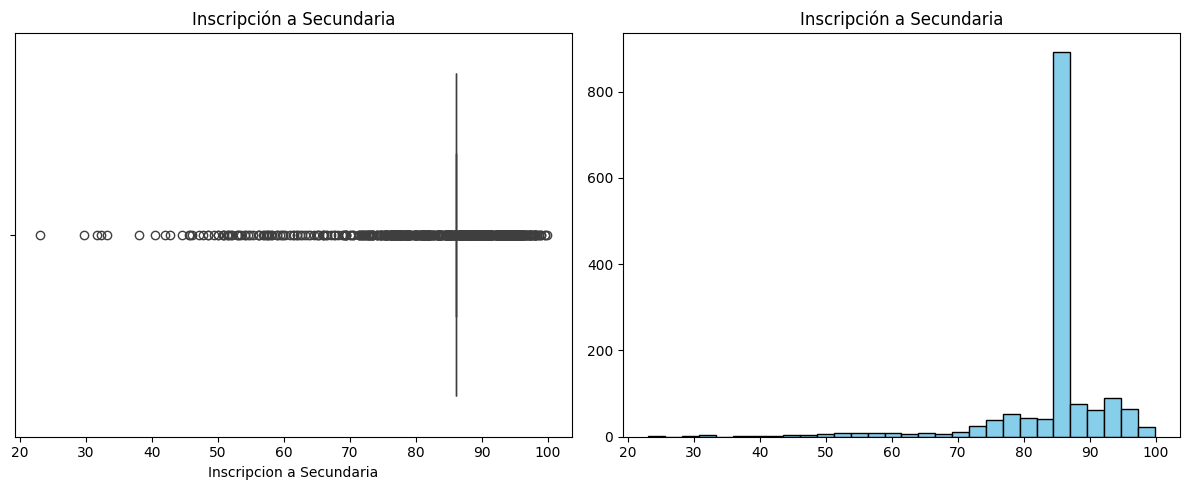

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


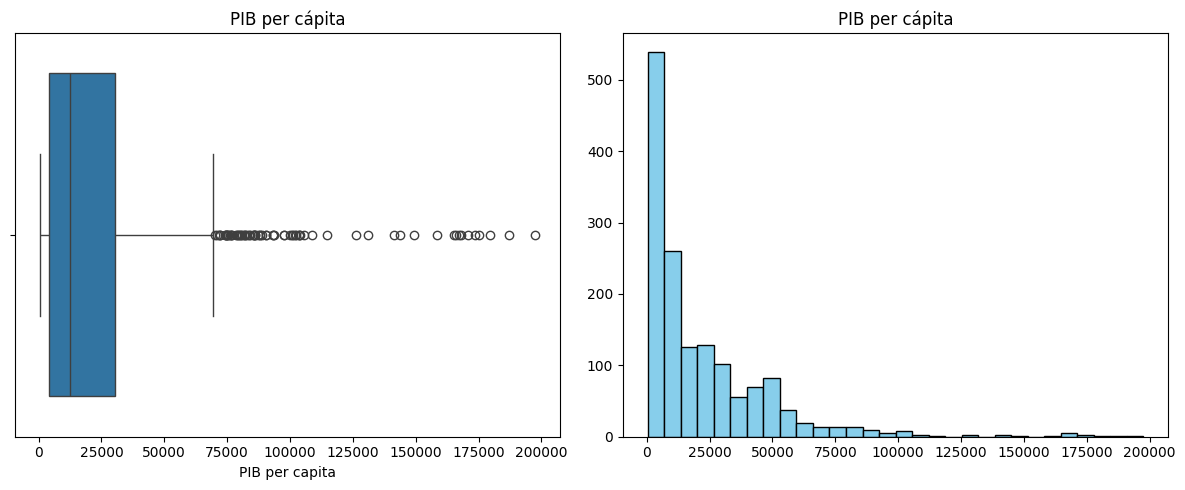

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


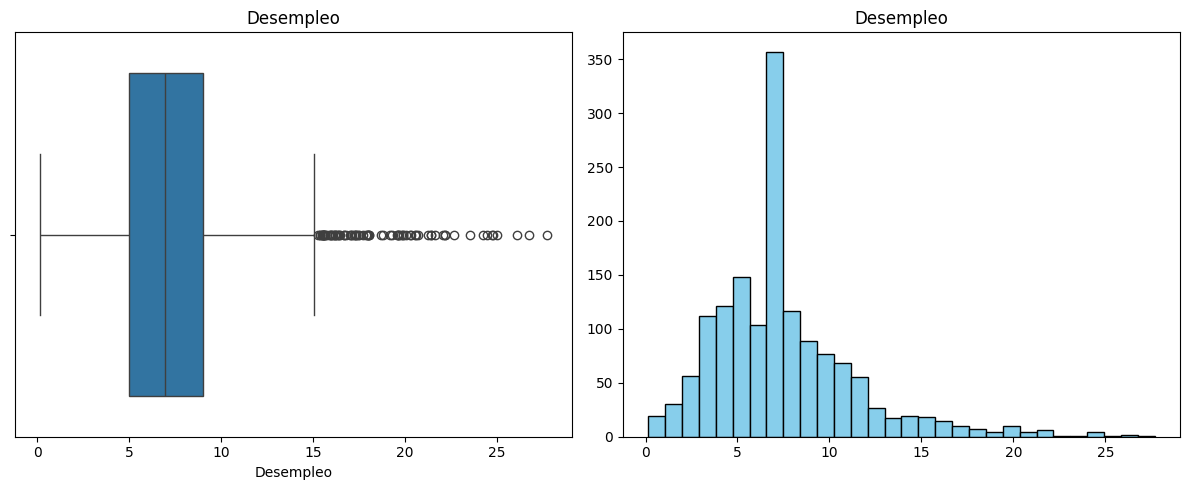

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x=dataset['Inscripcion a Secundaria'], ax=ax[0], orient='v')
ax[0].set_title("Inscripción a Secundaria")

ax[1].hist(dataset['Inscripcion a Secundaria'], bins=30,color='skyblue', edgecolor='black')
ax[1].set_title('Inscripción a Secundaria')

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x=dataset['PIB per capita'],ax=ax[0], orient='v')
ax[0].set_title("PIB per cápita")

ax[1].hist(dataset['PIB per capita'], bins=30,color='skyblue', edgecolor='black')
ax[1].set_title('PIB per cápita')

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x=dataset['Desempleo'],ax=ax[0], orient='v')
ax[0].set_title("Desempleo")

ax[1].hist(dataset['Desempleo'], bins=30,color='skyblue', edgecolor='black')

ax[1].set_title('Desempleo')

plt.tight_layout()
plt.show()


Mediante una correlación pudimos identificar que: la “Efectividad del gobierno”
tiene un 96% de correlación con el “Control de corrupción”; El “ Ingreso por impuesto” tiene un 68% de correlación con el “Gasto fiscal”; la esperanza de vida tiene un 61 y 62 % de correlación con “Inscripción a superior” y “PIB per cápita” respectivamente. Además el análisis de la covarianza se pudo corroborar que efectivamente existe un alta relación positiva entre las variables nombradas anteriormente, es decir, el movimiento de los valores de los atributos es lineal.


Podemos decir que con una mejora en el PIB per cápita se pueden esperar mejores
resultados en la esperanza de vida, al igual que con un mayor control de la corrupción
también se puede esperar una mayor efectividad del gobierno. Creemos que la correlación existente entre ingreso por impuesto y gasto fiscal viene dada porque al haber una mayor recaudación de impuestos se generan mayor cantidad de recursos para poder ser utilizados. A su vez una esperanza de vida mayor puede guardar relación con el PIB per cápita, debido a que el PIB per cápita es uno de los instrumentos de comparación entre países lo cual podría indicar que a un mayor nivel de este se puede asumir un mayor nivel de riqueza mejorando la calidad de vida de la población, llevando así a un aumento en la esperanza de vida.


In [ ]:
corr= dataset[['Año', 'Gasto Gobierno','Promocion a Secundaria','Inscripcion a Secundaria','Inscripcion a Superior','Crecimiento PIB per capita','PIB per capita','PIB','Esperanza de vida','Gasto en Salud','Pobreza Multidimensional','Deuda del Gobierno','Gasto Fiscal','Ingreso por Impuestos','Impuestos a la renta','Control de Corrupcion','Efectividad del Gobierno','Desempleo']].corr()
corr

,Año,Gasto Gobierno,Promocion a Secundaria,Inscripcion a Secundaria,Inscripcion a Superior,Crecimiento PIB per capita,PIB per capita,PIB,Esperanza de vida,Gasto en Salud,Pobreza Multidimensional,Deuda del Gobierno,Gasto Fiscal,Ingreso por Impuestos,Impuestos a la renta,Control de Corrupcion,Efectividad del Gobierno,Desempleo
Año,1.000000,0.183133,0.160410,0.127751,0.670865,0.002179,0.465702,0.335343,0.521470,-0.002841,0.173870,0.177970,0.166724,0.097269,0.164406,-0.017404,-0.018647,0.051970
Gasto Gobierno,0.183133,1.000000,0.172917,0.364704,0.368291,-0.089895,0.340577,0.260692,0.414919,0.286545,-0.091108,0.218881,0.590455,0.536003,0.311471,0.344911,0.361713,0.044811
Promocion a Secundaria,0.160410,0.172917,1.000000,0.301578,0.208985,0.032166,0.182978,0.143705,0.250917,0.167872,0.006483,0.024479,0.033661,0.036247,0.022944,0.126036,0.152060,-0.000409
Inscripcion a Secundaria,0.127751,0.364704,0.301578,1.000000,0.322026,-0.009601,0.318125,0.214234,0.268874,0.327547,-0.090451,0.120812,0.254503,0.271415,0.158028,0.446833,0.461994,0.101380
Inscripcion a Superior,0.670865,0.368291,0.208985,0.322026,1.000000,-0.031531,0.466783,0.303590,0.612062,0.259592,0.011437,0.293680,0.279374,0.236951,0.174250,0.311599,0.325293,0.128692
Crecimiento PIB per capita,0.002179,-0.089895,0.032166,-0.009601,-0.031531,1.000000,-0.011676,-0.065244,0.004734,-0.155759,0.023593,-0.053876,-0.080095,0.038255,0.005066,-0.022352,-0.041253,-0.108272
PIB per capita,0.465702,0.340577,0.182978,0.318125,0.466783,-0.011676,1.000000,0.243487,0.622243,0.333096,-0.135270,0.047338,0.191316,0.236981,0.269492,0.530505,0.551779,-0.191680
PIB,0.335343,0.260692,0.143705,0.214234,0.303590,-0.065244,0.243487,1.000000,0.379988,0.367017,-0.040082,0.184940,0.235423,-0.021392,0.320426,0.220261,0.220632,0.074998
Esperanza de vida,0.521470,0.414919,0.250917,0.268874,0.612062,0.004734,0.622243,0.379988,1.000000,0.337819,-0.046785,0.147355,0.303149,0.227343,0.288634,0.413765,0.424744,0.018591
Gasto en Salud,-0.002841,0.286545,0.167872,0.327547,0.259592,-0.155759,0.333096,0.367017,0.337819,1.000000,-0.266487,0.156387,0.271715,0.118633,0.130934,0.573675,0.586442,0.047808


<Axes: >

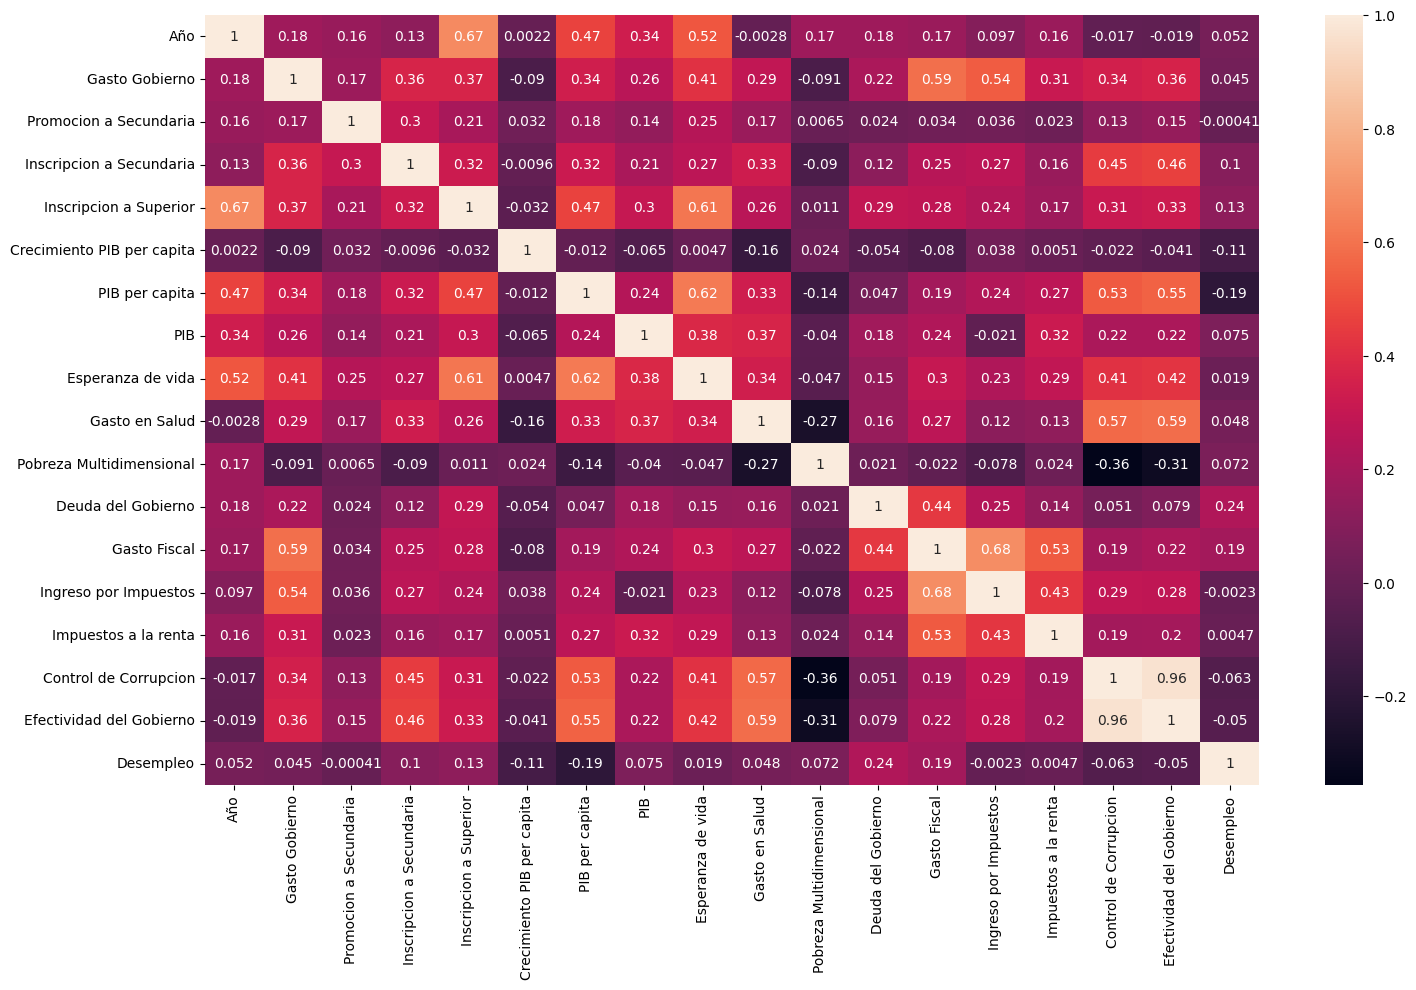

In [ ]:
plt.figure(figsize=(17,10))
sns.heatmap(corr,annot=True)

La covarianza es otra función que nos mide la similitud entre atributos, al igual que la correlación presenta una relación en como el aumento de una variable también puede indicar el aumento de otra. Dado esto apreciamos similitud entre los valores de la correlación y de la covarianza, además de que se mantienen nuestras suposiciones.



<Axes: >

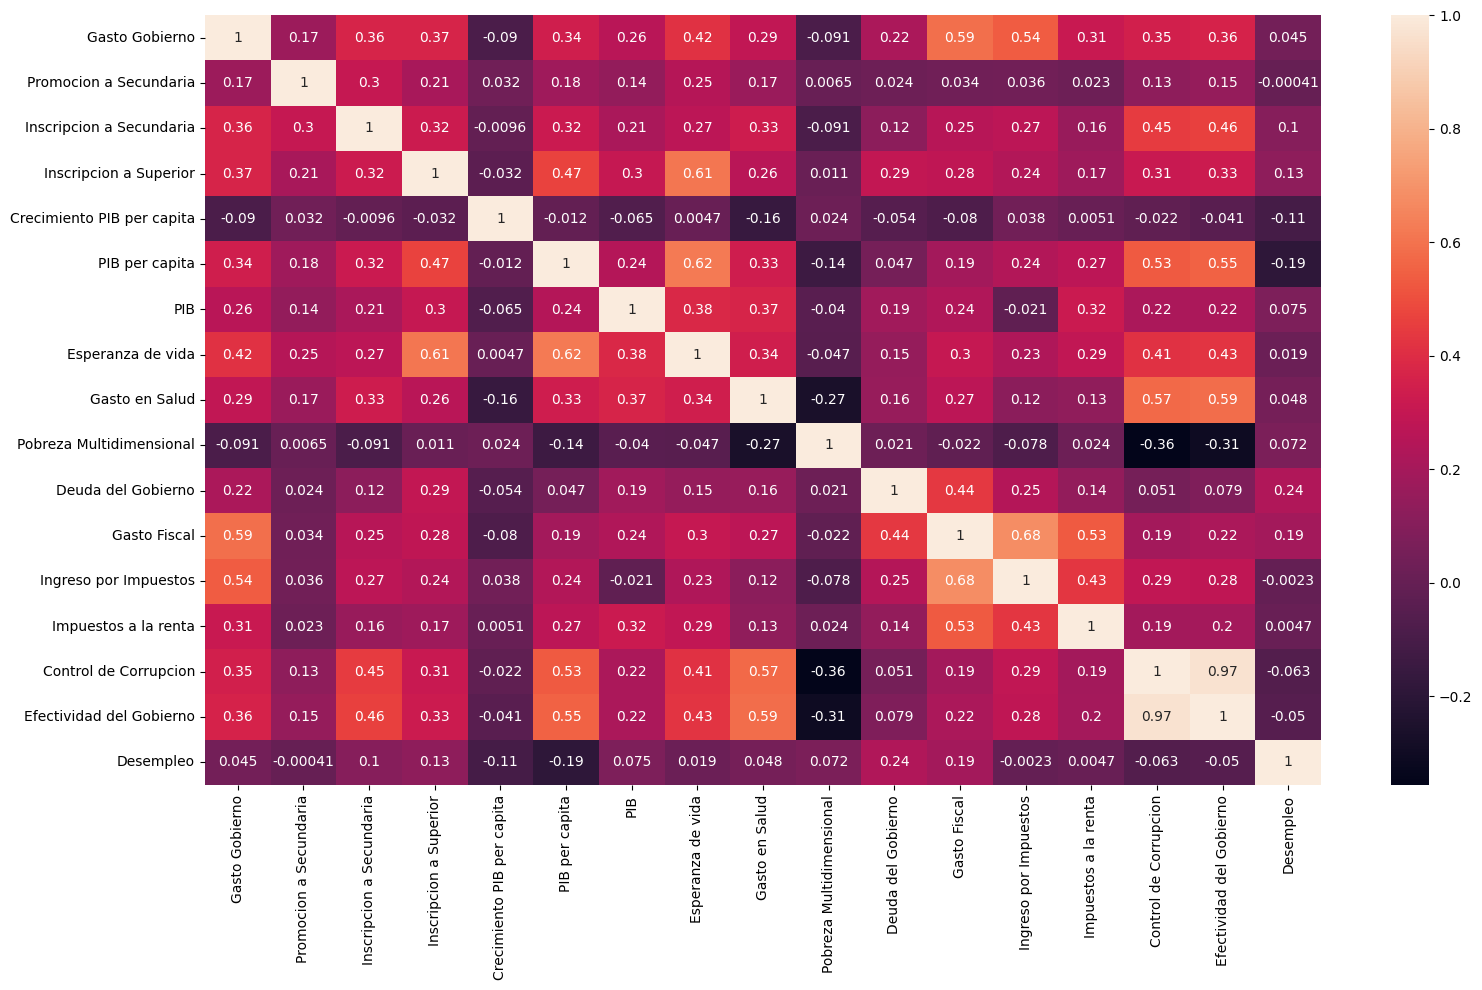

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
excluida=dataset[['Pais','Año']]
incluida= [col for col in dataset.columns if col not in excluida]

data_scaled = pd.DataFrame(scaler.fit_transform(dataset[incluida]), columns=incluida)

covarianza = data_scaled[['Gasto Gobierno','Promocion a Secundaria','Inscripcion a Secundaria','Inscripcion a Superior','Crecimiento PIB per capita','PIB per capita','PIB','Esperanza de vida','Gasto en Salud','Pobreza Multidimensional','Deuda del Gobierno','Gasto Fiscal','Ingreso por Impuestos','Impuestos a la renta','Control de Corrupcion','Efectividad del Gobierno','Desempleo']].cov()

plt.figure(figsize=(18,10))
sns.heatmap (covarianza,annot=True)

Para poder entender más el comportamiento de nuestra base de datos se realizó un
análisis de componentes principales (PCA) la cual nos indicó que para explicar el 70% de la varianza se tienen que crear 7 componente, lo cual nos ayuda a reducir la dimensionalidad de nuestra base de datos de 16 atributos. Para realizar el análisis numérico no se tomaron en consideración los atributos: “Nombre del país” y “Año”, esto debido a sus características de objeto. Realizamos un gráfico bidimensional tomando en cuenta dos PC, en nuestro caso, PC1 y PC7, donde se pueden ver donde están más concentrados los datos.

Text(0, 0.5, 'Cumulative Explained Variance')

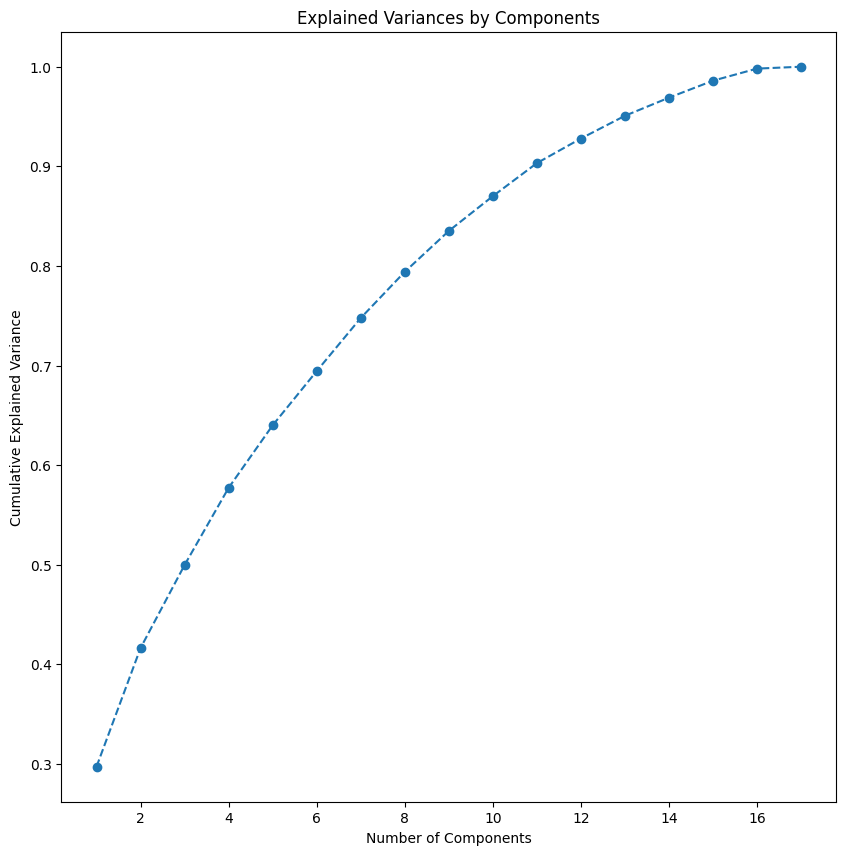

In [ ]:
from sklearn.decomposition import PCA

#Definir un numero de componentes aleatorio
n=data_scaled.shape[1]

#Encontrar los componentes principales
pca = PCA(n_components=n, random_state=1)
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))

#Porcentaje de Varianza
exp_var = pca.explained_variance_ratio_

plt.figure(figsize = (10,10))
plt.plot(range(1,18), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [ ]:
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.70):
    print("Número de PCs que explican a lo menos el 70% de la varianza: ", ix+1)
    break

Número de PCs que explican a lo menos el 70% de la varianza:  7


In [ ]:
pc_comps = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7']
data_pca = pd.DataFrame(np.round(pca.components_[:7,:],2),index=pc_comps,columns=data_scaled.columns)
data_pca.T

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Gasto Gobierno,0.30,0.21,0.11,-0.05,0.09,-0.23,-0.05
Promocion a Secundaria,0.13,-0.09,-0.34,-0.16,0.48,-0.38,0.32
Inscripcion a Secundaria,0.26,-0.07,-0.06,0.06,0.45,-0.16,0.17
Inscripcion a Superior,0.28,0.06,-0.37,-0.13,0.03,0.18,-0.38
Crecimiento PIB per capita,-0.03,-0.03,0.09,-0.46,0.32,0.69,0.36
PIB per capita,0.30,-0.20,-0.06,-0.30,-0.16,0.00,-0.26
PIB,0.21,0.03,-0.36,0.08,-0.42,0.06,0.52
Esperanza de vida,0.31,-0.03,-0.29,-0.25,-0.16,0.09,-0.20
Gasto en Salud,0.28,-0.20,-0.04,0.34,-0.11,-0.00,0.19
Pobreza Multidimensional,-0.10,0.28,-0.33,-0.28,0.02,-0.18,-0.10


In [ ]:
def color(valor):
    if valor <-0.3:
        return 'background: red'
    elif valor >=0.3:
        return 'background: green'

data_pca.T.style.applymap(color)

<ipython-input-27-b696993eab19>:7: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  data_pca.T.style.applymap(color)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Gasto Gobierno,0.300000,0.210000,0.110000,-0.050000,0.090000,-0.230000,-0.050000
Promocion a Secundaria,0.130000,-0.090000,-0.340000,-0.160000,0.480000,-0.380000,0.320000
Inscripcion a Secundaria,0.260000,-0.070000,-0.060000,0.060000,0.450000,-0.160000,0.170000
Inscripcion a Superior,0.280000,0.060000,-0.370000,-0.130000,0.030000,0.180000,-0.380000
Crecimiento PIB per capita,-0.030000,-0.030000,0.090000,-0.460000,0.320000,0.690000,0.360000
PIB per capita,0.300000,-0.200000,-0.060000,-0.300000,-0.160000,0.000000,-0.260000
PIB,0.210000,0.030000,-0.360000,0.080000,-0.420000,0.060000,0.520000
Esperanza de vida,0.310000,-0.030000,-0.290000,-0.250000,-0.160000,0.090000,-0.200000
Gasto en Salud,0.280000,-0.200000,-0.040000,0.340000,-0.110000,-0.000000,0.190000
Pobreza Multidimensional,-0.100000,0.280000,-0.330000,-0.280000,0.020000,-0.180000,-0.100000


Text(0.5, 1.0, 'Gráfico Relación PCA')

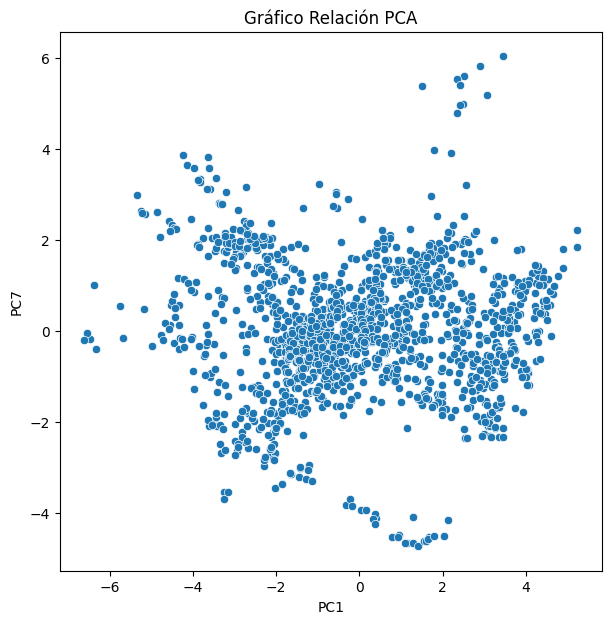

In [ ]:
plt.figure(figsize = (7,7))
sns.scatterplot(x=data_pca1[0],y=data_pca1[1])
plt.xlabel("PC1")
plt.ylabel("PC7")
plt.title("Gráfico Relación PCA")

# 3. Regresión Logística





 Se realiza un trabajo de preprocesamiento a las series de tiempos para poder realizar el modelo de Regresión Logística seleccionado en el primer entregable.Se han generando columnas con media y desviación estándar para cada atributo por cada país, logrando así captar la variabilidad y el valor esperado. A partir de esta base de datos se aplican criterios definidos por el Banco Mundial y la OCDE con la finalidad de poder definir qué países cuentan como desarrollados o no desarrollados, siendo esta última columna nuestro target value (output)

In [ ]:
import pandas as pd

# Atributos especificados
atributos = [
    'Gasto Gobierno', 'Promocion a Secundaria', 'Inscripcion a Secundaria', 'Inscripcion a Superior',
    'Crecimiento PIB per capita', 'PIB per capita', 'PIB', 'Esperanza de vida', 'Gasto en Salud',
    'Pobreza Multidimensional', 'Deuda del Gobierno', 'Gasto Fiscal', 'Ingreso por Impuestos',
    'Impuestos a la renta', 'Control de Corrupcion', 'Efectividad del Gobierno', 'Desempleo'
]

# Crear un DataFrame para almacenar los resultados
resultados = pd.DataFrame()

# Calcular la media y la desviación estándar para cada atributo por país
for atributo in atributos:
    resultados[f'{atributo}_media'] = dataset.groupby('Pais')[atributo].mean()
    resultados[f'{atributo}_desviacion'] = dataset.groupby('Pais')[atributo].std()

# Mostrar el DataFrame resultanteresultados
resultados

,Gasto Gobierno_media,Gasto Gobierno_desviacion,Promocion a Secundaria_media,Promocion a Secundaria_desviacion,Inscripcion a Secundaria_media,Inscripcion a Secundaria_desviacion,Inscripcion a Superior_media,Inscripcion a Superior_desviacion,Crecimiento PIB per capita_media,Crecimiento PIB per capita_desviacion,...,Ingreso por Impuestos_media,Ingreso por Impuestos_desviacion,Impuestos a la renta_media,Impuestos a la renta_desviacion,Control de Corrupcion_media,Control de Corrupcion_desviacion,Efectividad del Gobierno_media,Efectividad del Gobierno_desviacion,Desempleo_media,Desempleo_desviacion
Pais,,,,,,,,,,,,,,,,,,,,,
Argentina,13.370215,4.361151,96.324495,9.766447,82.546016,9.330463,52.244839,23.942706,0.677206,5.647820,...,13.798118,5.061553,26.300739,10.437195,58.013124,14.518765,62.168645,11.017959,8.43538,4.519778
Austria,19.001913,1.160427,98.397430,0.810661,85.728720,4.225451,46.457071,24.115266,1.610446,2.174261,...,22.638957,3.848552,42.030480,5.942967,81.145946,10.524877,82.095302,10.970629,4.21544,1.310129
Belgium,22.433985,1.309853,97.730226,2.077014,90.147676,5.001589,50.240169,19.141676,1.561955,2.038392,...,22.908490,2.634385,49.524251,9.291331,80.316241,9.493786,80.826402,9.948744,8.00120,2.028539
Bolivia,14.109296,2.664986,97.854589,0.950690,81.150071,6.877896,38.279701,0.000000,0.998598,3.092919,...,16.077053,5.015853,25.476014,15.242937,51.218228,21.644677,54.473288,19.087958,6.62488,4.679194
Brazil,16.424741,4.161542,96.782217,2.912394,84.982884,2.875135,29.032656,16.891740,1.368692,3.305017,...,18.592637,2.798059,42.344211,5.660814,60.994901,12.764958,59.794018,13.722164,7.51270,3.162436
Chile,12.678700,1.880575,97.479695,2.375519,86.283552,0.927345,43.751871,28.221990,2.661887,4.764336,...,17.426930,1.906982,29.410578,9.615091,78.776204,8.349442,75.890460,5.381654,8.94800,3.145079
Colombia,13.443551,3.204437,93.674233,12.450602,82.710231,5.986727,28.226406,17.766211,1.889683,2.849793,...,17.808111,3.224286,39.038043,4.085619,58.586095,13.737836,61.109367,11.718969,10.75442,3.128079
Denmark,24.805636,1.228572,98.507045,0.927176,87.674699,2.275866,54.164034,22.349782,1.490244,2.138348,...,31.066411,2.862796,47.510598,4.287266,84.933744,14.325414,84.479575,13.418111,6.37042,1.849535
Ecuador,14.054364,3.019760,90.753511,10.845859,77.662874,14.361090,35.490396,7.878885,1.452964,3.462561,...,18.964006,2.591006,37.248550,4.074794,51.118035,21.375176,52.392325,21.409598,5.92714,2.292022


Para clasificar a un país como "desarrollado", hemos seleccionado una serie de atributos claves alineados con estándares internacionales de instituciones como la OCDE, el Banco Mundial y el PNUD. Estos atributos reflejan aspectos esenciales de una economía estable y una sociedad con alta calidad de vida. En primer lugar, el PIB per cápita se utiliza como indicador de la riqueza promedio de la población, estableciendo un mínimo de 12,000 USD anuales, con un rango que en países desarrollados puede oscilar entre 20,000 y 60,000 USD o más. También consideramos el crecimiento del PIB per cápita, ya que un crecimiento anual entre 1-4% sugiere estabilidad; tasas demasiado altas pueden indicar economías en rápida expansión o con desigualdades, mientras que tasas negativas suelen reflejar crisis. La esperanza de vida al nacer, con un mínimo de 75-80 años, es otro indicador de bienestar general y acceso a servicios de salud eficaces. Otro atributo es el gasto en salud como porcentaje del PIB, donde un rango de entre 8% y 12% asegura servicios accesibles y de calidad, característica de sistemas sanitarios efectivos y universales.


In [ ]:
# Umbrales para determinar si un país es desarrollado
pib_per_capita_min = 12000
pib_per_capita_estable_min = 20000
crecimiento_pib_min = 0.8  # en porcentaje
crecimiento_pib_max = 4.5
esperanza_vida_min = 75
gasto_salud_min = 8
gasto_salud_max = 12

# Crear una nueva columna para determinar si el país es desarrollado
resultados['Es_Desarrollado'] = (
    (resultados['PIB per capita_media'] >= pib_per_capita_min) &
    (resultados['Crecimiento PIB per capita_media'].between(crecimiento_pib_min, crecimiento_pib_max)) &
    (resultados['Esperanza de vida_media'] >= esperanza_vida_min) &
    (resultados['Gasto en Salud_media'].between(gasto_salud_min, gasto_salud_max))
).astype(int)

# Mostrar el DataFrame con la nueva columna
resultados

,Gasto Gobierno_media,Gasto Gobierno_desviacion,Promocion a Secundaria_media,Promocion a Secundaria_desviacion,Inscripcion a Secundaria_media,Inscripcion a Secundaria_desviacion,Inscripcion a Superior_media,Inscripcion a Superior_desviacion,Crecimiento PIB per capita_media,Crecimiento PIB per capita_desviacion,...,Ingreso por Impuestos_desviacion,Impuestos a la renta_media,Impuestos a la renta_desviacion,Control de Corrupcion_media,Control de Corrupcion_desviacion,Efectividad del Gobierno_media,Efectividad del Gobierno_desviacion,Desempleo_media,Desempleo_desviacion,Es_Desarrollado
Pais,,,,,,,,,,,,,,,,,,,,,
Argentina,13.370215,4.361151,96.324495,9.766447,82.546016,9.330463,52.244839,23.942706,0.677206,5.647820,...,5.061553,26.300739,10.437195,58.013124,14.518765,62.168645,11.017959,8.43538,4.519778,0
Austria,19.001913,1.160427,98.397430,0.810661,85.728720,4.225451,46.457071,24.115266,1.610446,2.174261,...,3.848552,42.030480,5.942967,81.145946,10.524877,82.095302,10.970629,4.21544,1.310129,1
Belgium,22.433985,1.309853,97.730226,2.077014,90.147676,5.001589,50.240169,19.141676,1.561955,2.038392,...,2.634385,49.524251,9.291331,80.316241,9.493786,80.826402,9.948744,8.00120,2.028539,1
Bolivia,14.109296,2.664986,97.854589,0.950690,81.150071,6.877896,38.279701,0.000000,0.998598,3.092919,...,5.015853,25.476014,15.242937,51.218228,21.644677,54.473288,19.087958,6.62488,4.679194,0
Brazil,16.424741,4.161542,96.782217,2.912394,84.982884,2.875135,29.032656,16.891740,1.368692,3.305017,...,2.798059,42.344211,5.660814,60.994901,12.764958,59.794018,13.722164,7.51270,3.162436,0
Chile,12.678700,1.880575,97.479695,2.375519,86.283552,0.927345,43.751871,28.221990,2.661887,4.764336,...,1.906982,29.410578,9.615091,78.776204,8.349442,75.890460,5.381654,8.94800,3.145079,0
Colombia,13.443551,3.204437,93.674233,12.450602,82.710231,5.986727,28.226406,17.766211,1.889683,2.849793,...,3.224286,39.038043,4.085619,58.586095,13.737836,61.109367,11.718969,10.75442,3.128079,0
Denmark,24.805636,1.228572,98.507045,0.927176,87.674699,2.275866,54.164034,22.349782,1.490244,2.138348,...,2.862796,47.510598,4.287266,84.933744,14.325414,84.479575,13.418111,6.37042,1.849535,1
Ecuador,14.054364,3.019760,90.753511,10.845859,77.662874,14.361090,35.490396,7.878885,1.452964,3.462561,...,2.591006,37.248550,4.074794,51.118035,21.375176,52.392325,21.409598,5.92714,2.292022,0


A continuación se realiza un modelo de Regresión Logística, el cual para realizarse requiere la división del dataset en dos nuevas datas, una de entrenamiento del modelo la cual contiene el 70% de los datos y otra de validación del modelo que contiene el 30% restante.

En primer lugar se observa que la precisión del modelo, tiene un valor de: 0.5556 indicando que el 55.6% de las observaciones son clasificadas correctamente por el modelo en el conjunto de prueba. Este valor genera conflicto debido a que es muy bajo para un modelo binario, siendo un punto cercano al valor de máxima variabilidad y  se debiera considerar ajustes para mejorar su rendimiento.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Separar las características y la variable objetivo
X = resultados[[ 'Gasto Gobierno_media',	'Gasto Gobierno_desviacion',	'Promocion a Secundaria_media',	'Promocion a Secundaria_desviacion',	'Inscripcion a Secundaria_media',	'Inscripcion a Secundaria_desviacion',	'Inscripcion a Superior_media',	'Inscripcion a Superior_desviacion',
                'Crecimiento PIB per capita_media',	'Crecimiento PIB per capita_desviacion','PIB per capita_media', 'PIB per capita_desviacion','PIB_media','PIB_desviacion', 'Esperanza de vida_media','Esperanza de vida_desviacion', 'Gasto en Salud_media','Gasto en Salud_desviacion',
                'Pobreza Multidimensional_media','Pobreza Multidimensional_desviacion', 'Deuda del Gobierno_media','Deuda del Gobierno_desviacion', 'Gasto Fiscal_media','Gasto Fiscal_desviacion'		,'Ingreso por Impuestos_desviacion',	'Impuestos a la renta_media',	'Impuestos a la renta_desviacion',
                'Control de Corrupcion_media',	'Control de Corrupcion_desviacion',	'Efectividad del Gobierno_media',	'Efectividad del Gobierno_desviacion','Desempleo_media',	'Desempleo_desviacion']]

y = resultados['Es_Desarrollado']


# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de regresión logística
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = log_reg.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5555555555555556
Confusion Matrix:
 [[2 1]
 [3 3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       0.75      0.50      0.60         6

    accuracy                           0.56         9
   macro avg       0.57      0.58      0.55         9
weighted avg       0.63      0.56      0.57         9



En segundo lugar se observa la matriz de confusión con resultados: [[2 1] [3 3]]. Con valores [2,1] en la primera fila se interpreta que el modelo ha identificado 2 observaciones correctamente como “No Desarrollado” (significando  0 y 1 Desarrollado), y el valor 1 corresponde a que identificó de forma incorrecta a 1 país como desarrollado.
En la segunda fila con valores [3,3], el modelo clasificó correctamente 3 observaciones como “Desarrollado” (valor 1) pero se clasificó incorrectamente 3 observaciones como “No Desarrollado” (valor 0). Luego de haber distinguido el significado de cada valor de la matriz  se concluye que el modelo tiene problemas para diferenciar entre ambas clases, ya que está cometiendo errores en ambos tipos de predicciones. Las tasas de error en ambas clases sugieren que es necesario ajustar el modelo para capturar mejor las características distintivas entre los países desarrollados y no desarrollados.

AUC-ROC: 0.5555555555555556


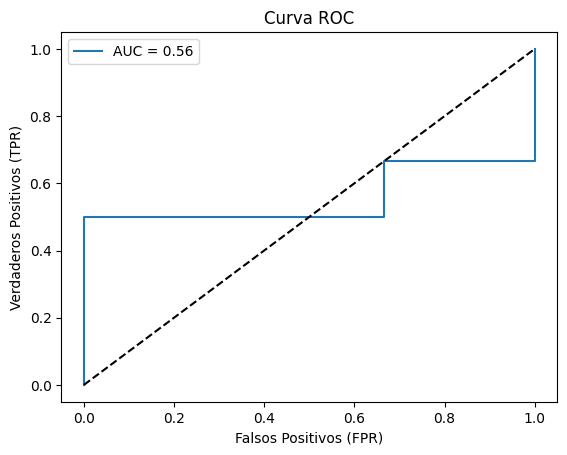

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calcular la probabilidad de la clase positiva
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Calcular el AUC-ROC
auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC: {auc}')

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Graficar la curva ROC
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal de referencia (modelo aleatorio)
plt.xlabel('Falsos Positivos (FPR)')
plt.ylabel('Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()

La curva ROC representa la relación entre la tasa de verdaderos positivos (True Positive Rate, TPR) esto indica cuando el valor real y el valor predecido coinciden y la tasa de falsos positivos (False Positive Rate, FPR) esto indica cuando los valores no coinciden y el valor predecido es, en el caso de este proyecto, desarrollado cuando el país no lo es. Estos se clasifican en umbrales de clasificación.

El área bajo la curva AUC (0.56)  indica la capacidad del modelo de distinguir entre si un país es desarrollado o no desarrollado. Un AUC de 0.5 indica que el modelo no tiene poder de discriminación por lo tanto no tiene preferencia ante una opción y es equivalente a decir que es una elección aleatoria. Mientras que un AUC de 1.0 indicaría una predicción perfecta. Un AUC de 0.56 es muy bajo y cercano al 0.5 por lo tanto, como se menciona anteriormente sugiere que el modelo en la tarea de clasificación se encuentra cercano al azar.


A continuación se explica el supuesto de la ausencia de multicolinealidad, el cual se presenta inválido ya que se encontró que muchos atributos son dependientes unos de otros, lo cual afecta a la precisión y confiabilidad del modelo.

Dado los resultados de este la validación de este supuesto, es que se decide no seguir validando más supuestos, además de su pésimo desempeño en las predicciones.


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.api import Logit
from statsmodels.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Preparación de los datos
X = resultados[['Gasto Gobierno_media',	'Gasto Gobierno_desviacion',	'Promocion a Secundaria_media',	'Promocion a Secundaria_desviacion',	'Inscripcion a Secundaria_media',	'Inscripcion a Secundaria_desviacion',	'Inscripcion a Superior_media',	'Inscripcion a Superior_desviacion',
                'Crecimiento PIB per capita_media',	'Crecimiento PIB per capita_desviacion','PIB per capita_media', 'PIB per capita_desviacion','PIB_media','PIB_desviacion', 'Esperanza de vida_media','Esperanza de vida_desviacion', 'Gasto en Salud_media','Gasto en Salud_desviacion',
                'Pobreza Multidimensional_media','Pobreza Multidimensional_desviacion', 'Deuda del Gobierno_media','Deuda del Gobierno_desviacion', 'Gasto Fiscal_media','Gasto Fiscal_desviacion'		,'Ingreso por Impuestos_desviacion',	'Impuestos a la renta_media',	'Impuestos a la renta_desviacion',
                'Control de Corrupcion_media',	'Control de Corrupcion_desviacion',	'Efectividad del Gobierno_media',	'Efectividad del Gobierno_desviacion','Desempleo_media',	'Desempleo_desviacion']]

y = resultados['Es_Desarrollado']

# Añadir constante
X = add_constant(X)

# Paso 1: Eliminar columnas constantes
X = X.loc[:, (X != X.iloc[0]).any()]

# Paso 2: Revisar VIF para detectar multicolinealidad
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF antes de eliminar variables:", vif_data)

# Eliminar variables con VIF > 10, ya que estas tienen alta multicolinealidad
# Puedes ajustar el umbral de VIF según tus necesidades
while vif_data['VIF'].max() > 10:
    max_vif_variable = vif_data.loc[vif_data['VIF'].idxmax(), 'Variable']
    if max_vif_variable == 'const':
        break  # No eliminamos la constante
    print(f"Eliminando {max_vif_variable} debido a VIF alto")
    X = X.drop(columns=[max_vif_variable])
    vif_data = pd.DataFrame()
    vif_data['Variable'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("VIF después de eliminar variables:", vif_data)

# Paso 3: Ajustar el modelo logit
try:
    logit_model = Logit(y, X).fit(disp=0)
    print(logit_model.summary())
except np.linalg.LinAlgError:
    print("El problema de singularidad persiste. Intenta eliminar más variables o revisar el conjunto de datos.")

VIF antes de eliminar variables:                                  Variable           VIF
0                    Gasto Gobierno_media  4.692941e+08
1               Gasto Gobierno_desviacion  2.093205e+09
2            Promocion a Secundaria_media  7.293420e+08
3       Promocion a Secundaria_desviacion  1.747281e+09
4          Inscripcion a Secundaria_media  2.140343e+08
5     Inscripcion a Secundaria_desviacion  9.726468e+07
6            Inscripcion a Superior_media  1.630548e+09
7       Inscripcion a Superior_desviacion  1.535778e+09
8        Crecimiento PIB per capita_media  4.005454e+08
9   Crecimiento PIB per capita_desviacion  1.385887e+09
10                   PIB per capita_media  2.348132e+11
11              PIB per capita_desviacion  3.164562e+10
12                              PIB_media  3.541819e+11
13                         PIB_desviacion  5.132307e+12
14                Esperanza de vida_media  8.850066e+09
15           Esperanza de vida_desviacion  2.442071e+08
16             

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Eliminando Efectividad del Gobierno_desviacion debido a VIF alto
Eliminando Deuda del Gobierno_media debido a VIF alto
Eliminando Control de Corrupcion_media debido a VIF alto
Eliminando Pobreza Multidimensional_media debido a VIF alto
Eliminando Inscripcion a Superior_media debido a VIF alto
Eliminando Impuestos a la renta_media debido a VIF alto
Eliminando Gasto Fiscal_media debido a VIF alto
Eliminando Inscripcion a Superior_desviacion debido a VIF alto
Eliminando Desempleo_desviacion debido a VIF alto
Eliminando Esperanza de vida_desviacion debido a VIF alto
Eliminando Crecimiento PIB per capita_desviacion debido a VIF alto
Eliminando Ingreso por Impuestos_desviacion debido a VIF alto
Eliminando Control de Corrupcion_desviacion debido a VIF alto
Eliminando Desempleo_media debido a VIF alto
VIF después de eliminar variables:                               Variable       VIF
0            Gasto Gobierno_desviacion  7.441271
1    Promocion a Secundaria_desviacion  2.929705
2  Inscripcio

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


In [ ]:
resultados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, Argentina to Venezuela, RB
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gasto Gobierno_media                   30 non-null     float64
 1   Gasto Gobierno_desviacion              30 non-null     float64
 2   Promocion a Secundaria_media           30 non-null     float64
 3   Promocion a Secundaria_desviacion      30 non-null     float64
 4   Inscripcion a Secundaria_media         30 non-null     float64
 5   Inscripcion a Secundaria_desviacion    30 non-null     float64
 6   Inscripcion a Superior_media           30 non-null     float64
 7   Inscripcion a Superior_desviacion      30 non-null     float64
 8   Crecimiento PIB per capita_media       30 non-null     float64
 9   Crecimiento PIB per capita_desviacion  30 non-null     float64
 10  PIB per capita_media                   30 non-null     float64

# 4. Cluster
Dado que el modelo de regresión logística rompe varios de sus supuestos fundamentales y los resultados obtenidos no son ni confiables ni precisos, se ha decidido un cambio de metodología. La complejidad de construir un modelo clasificador preciso para este caso ha mostrado ser una limitación, por lo que es necesario explorar alternativas que puedan ofrecer información valiosa de manera más efectiva.

Para abordar este desafío, se opta por aplicar un análisis de Clustering, el cual es un método de aprendizaje no supervisado. Esta técnica permitirá agrupar los países según características similares, facilitando la identificación de patrones comunes entre ellos. Al analizar cada grupo por separado, podremos profundizar en los factores que impulsan el desarrollo, manteniendo el objetivo de generar conocimiento sobre cómo los países no desarrollados podrían avanzar hacia un desarrollo sostenible.

De esta forma analizaremos las series de tiempo de cada cluster de países por separado y la variable a predecir será el PIB per capita promedio del Cluster. Se ha elegido esta variable a predecir ya que es la forma más utilizada a nivel mundial para comparar y medir el desarrollo de los países, porque es un indicador de bienestar promedio de las poblaciones, siendo una métrica clave para evaluar la calidad de vida, además es un indicador estandarizado que permite la comparabilidad entre países, esto permite identificar las brechas económicas entre ellos. Igualmente el PIB per capita esta fuertemente relacionado a otros indicadores de desarrollo como la esperanza de vida, el acceso a la eduación y sumado a ello es usado frecuentemente por instituciones internacionales como el Banco Mundial y el FMI para clasificar países en niveles de ingreso (bajo, medio, alto).



El siguiente código cumple la funcion de escalar toda nuestra base de datos.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Suponiendo que 'resultados' contiene las características para cada país
# Seleccionar solo las columnas numéricas
data_numerica = resultados.select_dtypes(include=[float, int])

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerica)

# Convertir a DataFrame para mantener la estructura
data_scaled = pd.DataFrame(data_scaled, columns=data_numerica.columns)

A continuación se genera el gráfico para determinar la cantidad de componentes que seran utilizados para realizar el cluster.

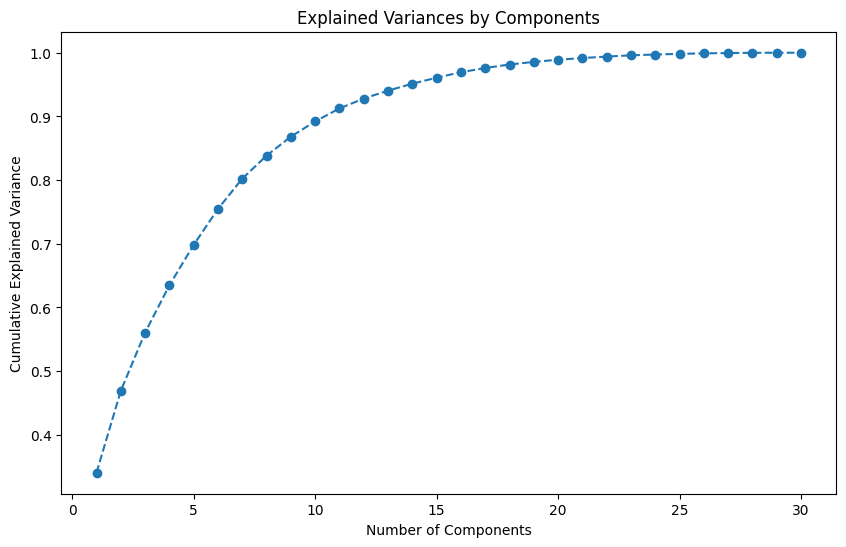

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Definir un número de componentes aleatorio (puedes ajustar este número según el análisis de varianza)
n_componentes = 30

# Encontrar los componentes principales
pca = PCA(n_components=n_componentes, random_state=1)
data_pca = pd.DataFrame(pca.fit_transform(data_scaled))

# Porcentaje de Varianza
exp_var = pca.explained_variance_ratio_

# Gráfico de varianza explicada
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_componentes + 1), exp_var.cumsum(), marker='o', linestyle='--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

Aquí encontramos, de forma automatizada, la cantidad de componentes que capturen el 70% de la varianza de nuestra base de datos.

In [ ]:
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.70):
    print("Número de PCs que explican a lo menos el 70% de la varianza: ", ix+1)
    break

Número de PCs que explican a lo menos el 70% de la varianza:  6


Habiendo encontrado ya el número de componentes para realizar los clusters, se procede a definir cuántos son los números de clusters que se formarán, esto lo decidimos mediante el método del codo a través del siguiente código.

<ipython-input-39-385dd0819aaf>:17: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "bo-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(K, inercia, 'bo-', linestyle='--')


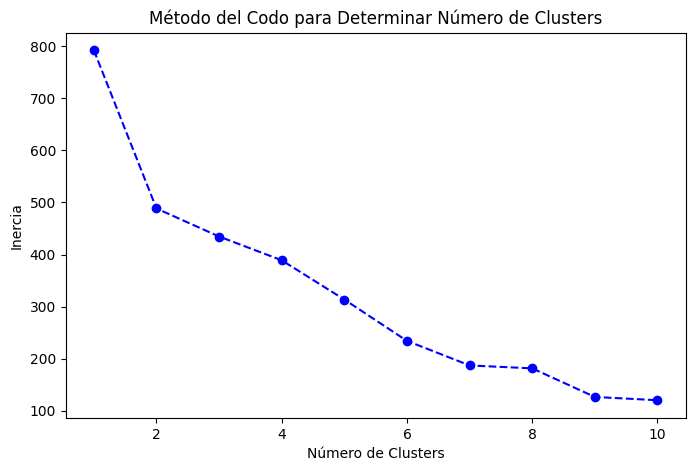

In [ ]:
from sklearn.cluster import KMeans

n_componentes_optimos = 6

pca = PCA(n_components=n_componentes_optimos, random_state=1)
data_pca_optimo = pca.fit_transform(data_scaled)

inercia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_pca_optimo)
    inercia.append(kmeans.inertia_)

# Graficar la inercia para ver el "codo"
plt.figure(figsize=(8, 5))
plt.plot(K, inercia, 'bo-', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar Número de Clusters')
plt.show()

En el siguiente código se procede a aplicar el método de Clustering aprendido en clase, fusionando los PCAs encontrados y el número de clusters determinados por los códigos anteriores.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



# Definir el número de clusters
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=1)

resultados['Cluster'] = kmeans.fit_predict(data_pca_optimo)


resultados[['Cluster']]

,Cluster
Pais,
Argentina,1
Austria,2
Belgium,2
Bolivia,1
Brazil,1
Chile,1
Colombia,1
Denmark,2
Ecuador,1


En el siguiente código podemos ver de forma gráfica a qué clusters corresponde cada país de nuestra base de datos.

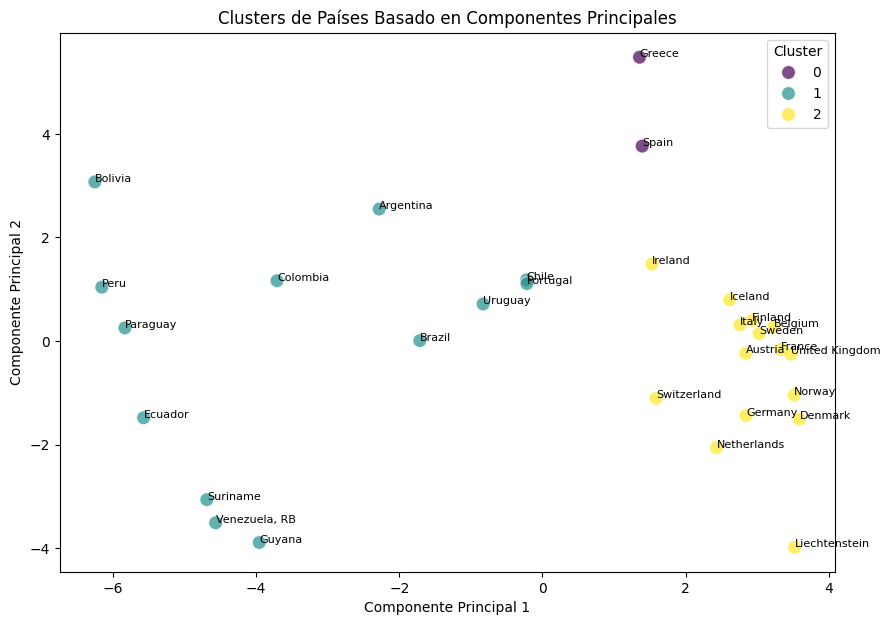

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Restablecemos el índice para que los nombres de los países sean una columna si no lo son ya
resultados.reset_index(inplace=True)

# Scatter plot de los primeros dos componentes principales, coloreados por cluster
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=data_pca_optimo[:, 0], y=data_pca_optimo[:, 1],
    hue=resultados['Cluster'], palette="viridis", s=100, alpha=0.7
)

# Etiquetar cada punto con el nombre del país
for i, country in enumerate(resultados['Pais']):  # Asegúrate que 'index' sea el nombre de la columna con los países
    plt.text(data_pca_optimo[i, 0], data_pca_optimo[i, 1], country, fontsize=8)

plt.title("Clusters de Países Basado en Componentes Principales")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster", loc="upper right")
plt.show()

# 5. Serie de Tiempo (ARIMA)

Para poder realizar el trabajo de predicción de la serie de tiempo, se debe realizar modificaciones en la base de datos original, estas modificaciones consisten en agregar a que cluster corresponde cada país. Para esto se realiza el siguiente código el cual agrega una nueva columna llamada Cluster, la cual contiene todos los clusters, de esta forma se puede trabajar la serie de tiempo por cluster aprovechando así la ventaja de las características que comparten los países.


In [ ]:
import pandas as pd


# Define el diccionario de asignación de clusters por país
clusters = {
    'Argentina': 1,
    'Austria':	2,
    'Belgium':	2,
    'Bolivia':	1,
    'Brazil':	1,
    'Chile':	1,
    'Colombia':	1,
    'Denmark':	2,
    'Ecuador':	1,
    'Finland':	2,
    'France':	2,
    'Germany':	2,
    'Greece':	0,
    'Guyana':	1,
    'Iceland':	2,
    'Ireland':	2,
    'Italy':	2,
    'Liechtenstein':	2,
    'Netherlands':	2,
    'Norway':	2,
    'Paraguay':	1,
    'Peru':	1,
    'Portugal':	1,
    'Spain':	0,
    'Suriname':	1,
    'Sweden':	2,
    'Switzerland':	2,
    'United Kingdom':	2,
    'Uruguay':	1,
    'Venezuela, RB':	1,
}

# Agrega la columna 'cluster' usando el mapeo del diccionario
dataset['Cluster'] = dataset['Pais'].map(clusters)

dataset[['Pais', 'Cluster']]

,Pais,Cluster
0,Argentina,1
1,Argentina,1
2,Argentina,1
3,Argentina,1
4,Argentina,1
...,...,...
1495,Norway,2
1496,Norway,2
1497,Norway,2
1498,Norway,2


Una vez realizada la modificación, es que se presenta el siguiente gráfico de la serie de tiempo, la cual está basada en la media de cada cluster. Dada la gráfica es posible notar como los clusteres 0 y 2 presentan valores más grandes que el cluster 1, la principal razón de esta diferencia es que los primeros clusters mencionados contienen a los países europeos, los cuales son desarrollados teniendo así un PIB per cápita mucho mayor a los países del cono sur de América que pertenecen al cluster 1.






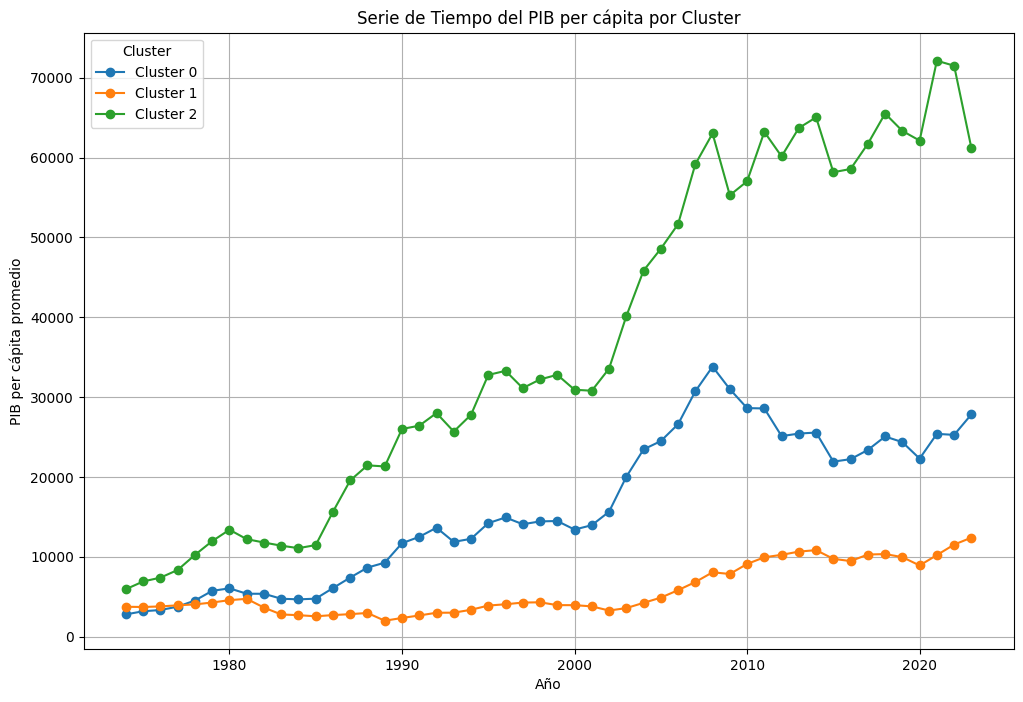

In [ ]:
import matplotlib.pyplot as plt


# 2. Agrupar por año y cluster
serie_tiempo = dataset.groupby(['Año', 'Cluster'])['PIB per capita'].mean().reset_index()

# 3. Graficar la serie de tiempo
plt.figure(figsize=(12, 8))
for cluster in serie_tiempo['Cluster'].unique():
    datos_cluster = serie_tiempo[serie_tiempo['Cluster'] == cluster]
    plt.plot(datos_cluster['Año'], datos_cluster['PIB per capita'], marker='o', label=f'Cluster {cluster}')

plt.title('Serie de Tiempo del PIB per cápita por Cluster')
plt.xlabel('Año')
plt.ylabel('PIB per cápita promedio')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

A modo de comparación con el gráfico anterior, se ha realizado el mismo gráfico, pero esta vez utilizando le mediana para cada año. Es posible notar como los valores disminuyen, ejemplo claro es en cluster 2 que en el gráfico anterior presentaba un máximo superior a 70000 USD, mientras que ahora no alcanza ni los 60000 USD, esto se debe a que hay datos que aumentan el promedio en cada cluster.




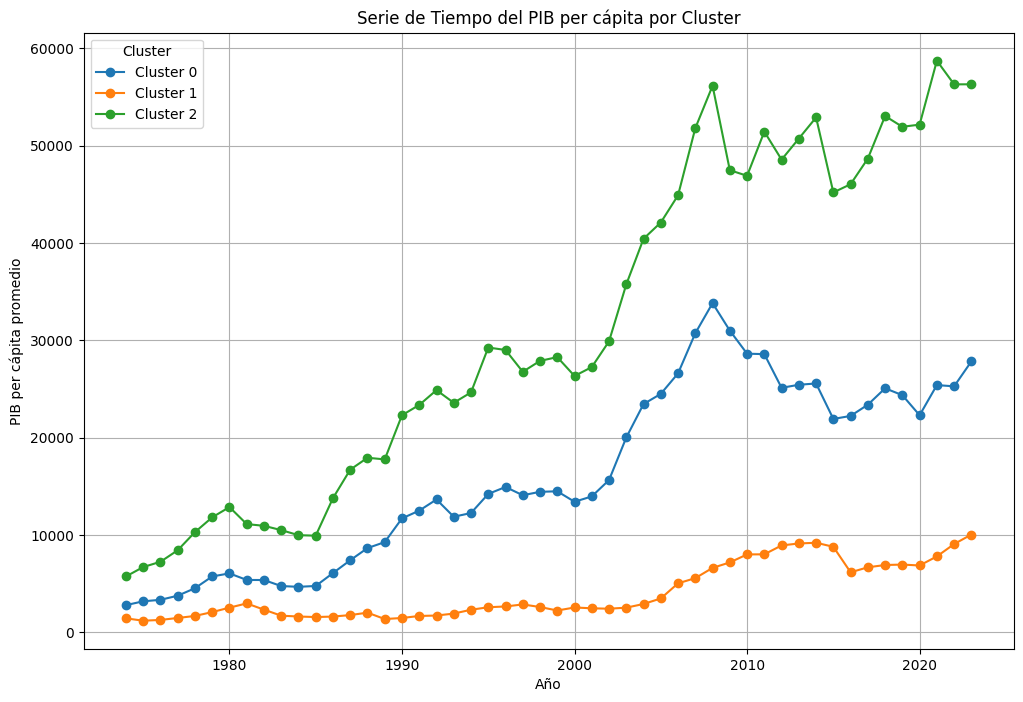

In [ ]:
import matplotlib.pyplot as plt


# 2. Agrupar por año y cluster
serie_tiempo = dataset.groupby(['Año', 'Cluster'])['PIB per capita'].median().reset_index()

# 3. Graficar la serie de tiempo
plt.figure(figsize=(12, 8))
for cluster in serie_tiempo['Cluster'].unique():
    datos_cluster = serie_tiempo[serie_tiempo['Cluster'] == cluster]
    plt.plot(datos_cluster['Año'], datos_cluster['PIB per capita'], marker='o', label=f'Cluster {cluster}')

plt.title('Serie de Tiempo del PIB per cápita por Cluster')
plt.xlabel('Año')
plt.ylabel('PIB per cápita promedio')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Para la realización de la predicción se realiza un modelo que trabaja con series de tiempo, este modelo es ARIMA, él es el resultado de la mezcla de 3 modelos, en primer lugar un componente AR (Auto Regresivo) que permite capturar los valores pasados de la serie, I (Integrativo) es la que permite que la serie de tiempo se vuelva estacionaria y MA (Media Móvil) el captura los errores de los valores pasado en la serie de tiempo.
Es gracias a este modelo que podemos captar los valores de la serie de tiempo y poder generar una predicción.



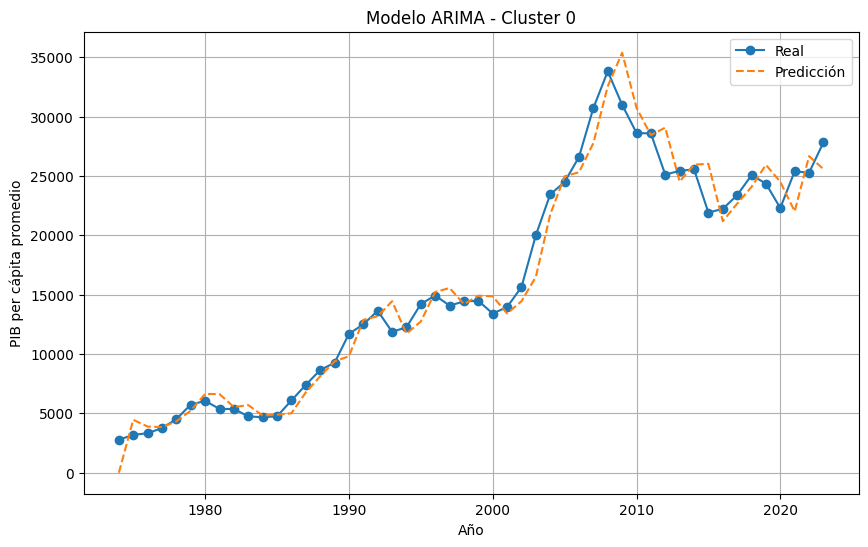

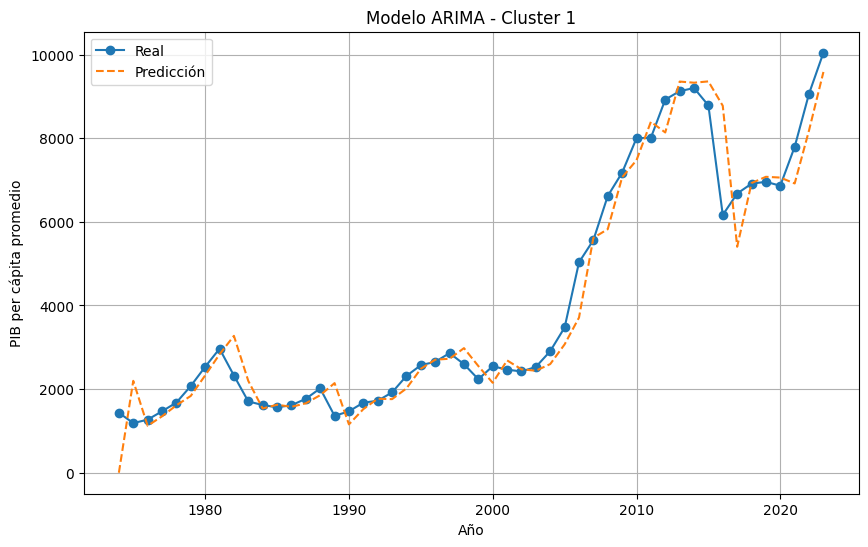

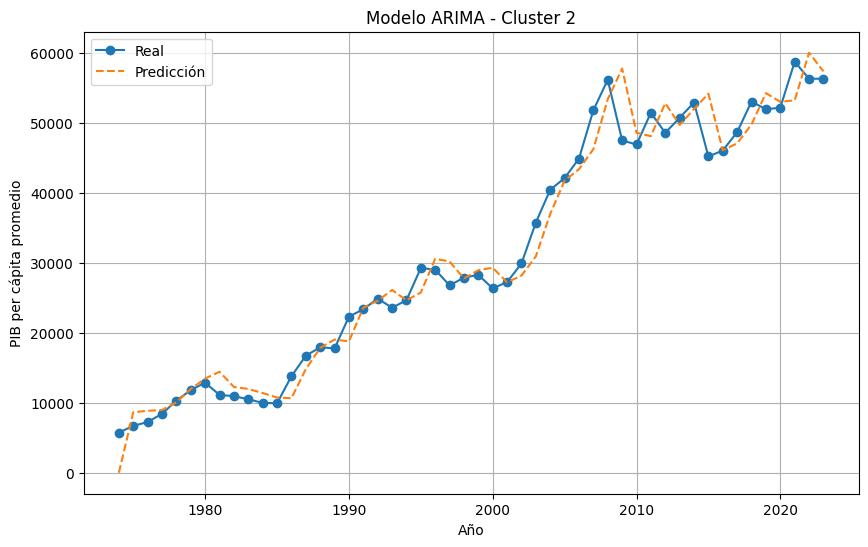

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Agrupar por año y cluster
serie_tiempo = dataset.groupby(['Año', 'Cluster'])['PIB per capita'].median().reset_index()

# Crear un diccionario para almacenar los resultados de los modelos ARIMA por cluster
resultados_arima = {}

# Iterar sobre cada cluster
for cluster in serie_tiempo['Cluster'].unique():
    # Filtrar los datos del cluster
    datos_cluster = serie_tiempo[serie_tiempo['Cluster'] == cluster]

    # Crear una serie de tiempo con índice consecutivo
    serie = datos_cluster.set_index('Año')['PIB per capita']

    # Verificar y completar años faltantes con interpolación
    serie = serie.reindex(range(serie.index.min(), serie.index.max() + 1), fill_value=None)
    serie = serie.interpolate()  # Interpolar valores faltantes si es necesario

    # Convertir el índice numérico a formato de fecha y especificar la frecuencia
    serie.index = pd.date_range(start=str(serie.index.min()), end=str(serie.index.max()), freq='YS')

    try:
        # Ajustar el modelo ARIMA
        modelo = ARIMA(serie, order=(1, 2, 1))  # Ajusta (p, d, q) según sea necesario
        modelo_fit = modelo.fit()

        # Almacenar los resultados en el diccionario
        resultados_arima[cluster] = modelo_fit

        # Predicciones
        predicciones = modelo_fit.predict(start=serie.index.min(), end=serie.index.max())

        # Graficar resultados
        plt.figure(figsize=(10, 6))
        plt.plot(serie.index, serie, label='Real', marker='o')
        plt.plot(predicciones.index, predicciones, label='Predicción', linestyle='--')
        plt.title(f'Modelo ARIMA - Cluster {cluster}')
        plt.xlabel('Año')
        plt.ylabel('PIB per cápita promedio')
        plt.legend()
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"Error al ajustar el modelo para el cluster {cluster}: {e}")


Al igual que los otros modelos, esté presenta supuestos y evaluación del modelos, en este caso al tratarse de un modelo ARIMA, se realizan las pruebas ACF y PACF las cuales identifican la hipótesis nula de que los residuos son estacionarios, la cual se rechaza, lo cual indica una validación de los supuestos, y la autocorrelación de residuos la cual es cercana a 0 por lo que no hay una autocorrelación entre los residuos.


--- Validación para el Cluster 0 ---
Prueba de estacionariedad (ADF Test) para los residuos:
ADF Statistic: -7.0890, p-value: 0.0000
Los residuos son estacionarios (rechazamos H0).


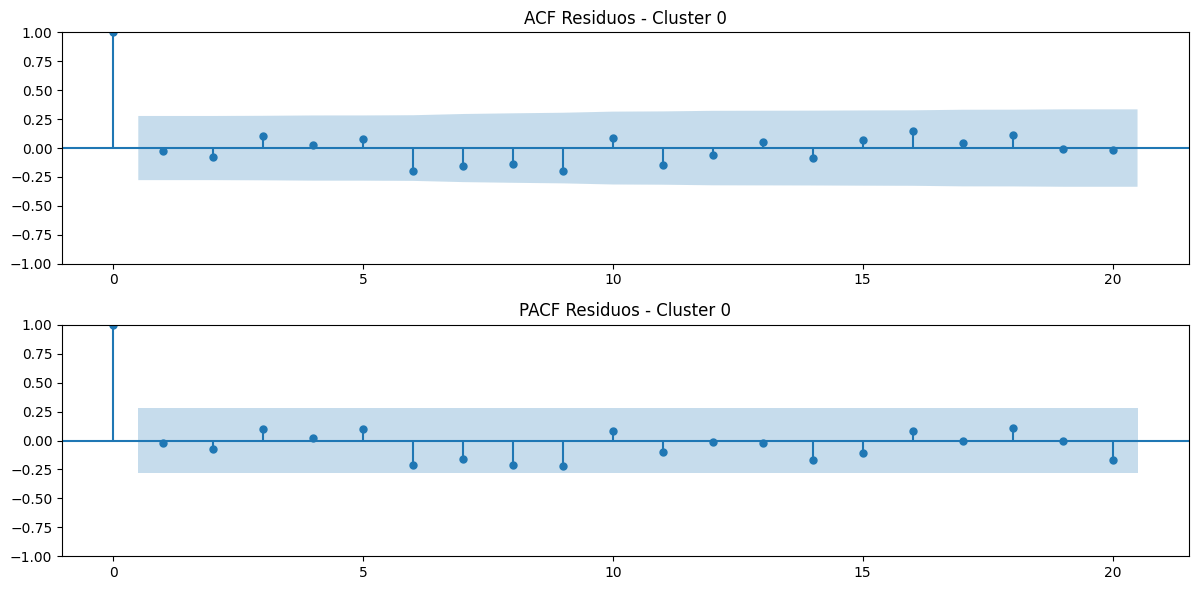

Autocorrelación de residuos (ACF):
ACF lags 1-5: [-0.02188541 -0.07418346  0.10259841  0.02626165  0.08146288] (deberían ser cercanos a 0)


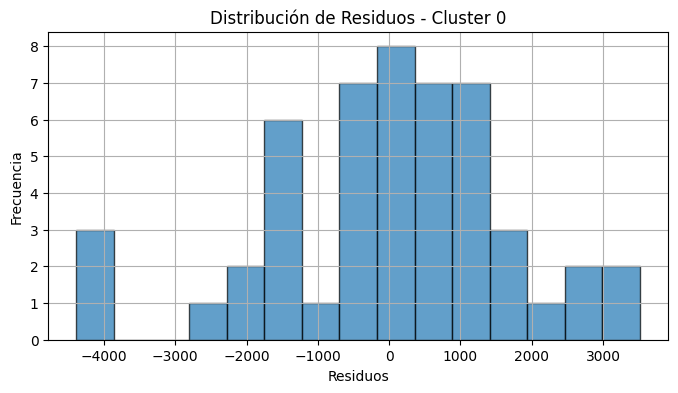

Evaluación del rendimiento para Cluster 0:
Mean Squared Error (MSE): 303856839.0503
Mean Absolute Error (MAE): 15167.4844
Root Mean Squared Error (RMSE): 17431.4899

--- Validación para el Cluster 1 ---
Prueba de estacionariedad (ADF Test) para los residuos:
ADF Statistic: -8.1109, p-value: 0.0000
Los residuos son estacionarios (rechazamos H0).


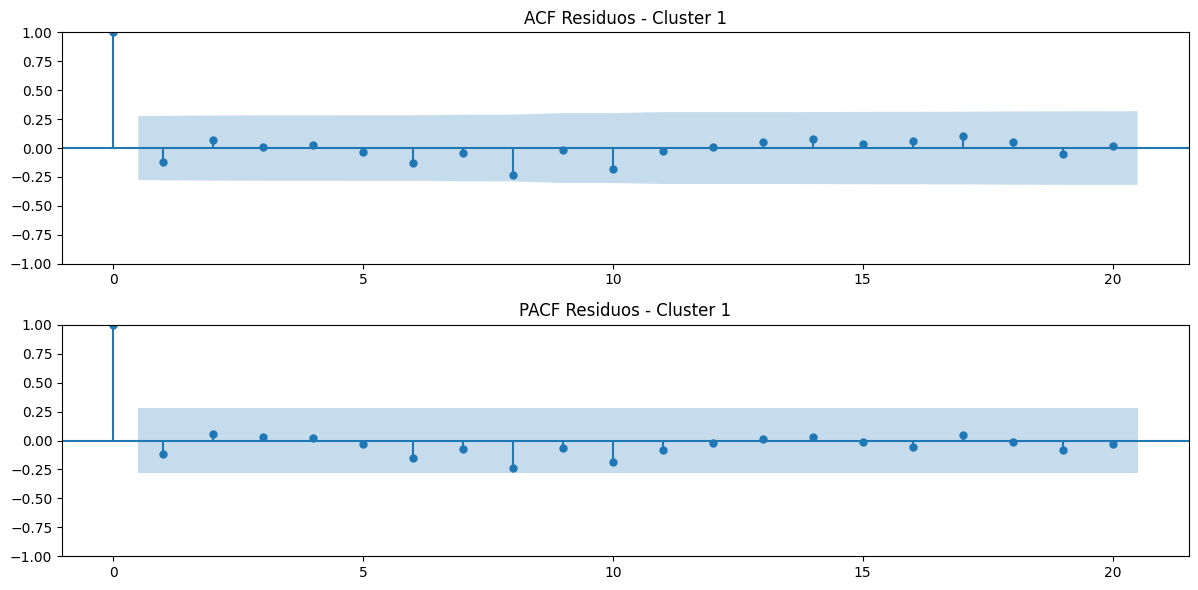

Autocorrelación de residuos (ACF):
ACF lags 1-5: [-0.11896244  0.0715489   0.01101696  0.02320888 -0.03417372] (deberían ser cercanos a 0)


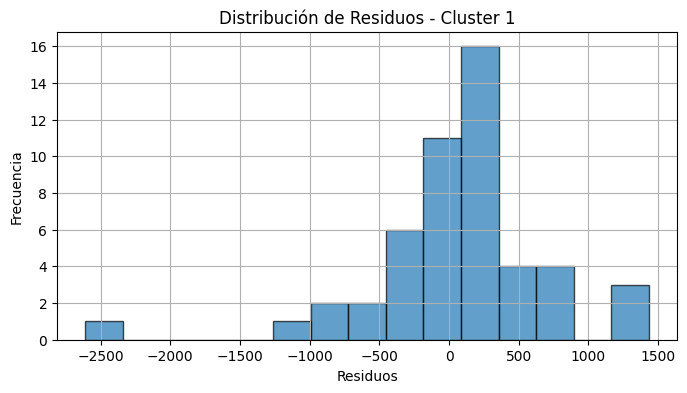

Evaluación del rendimiento para Cluster 1:
Mean Squared Error (MSE): 958239425.8919
Mean Absolute Error (MAE): 27246.1013
Root Mean Squared Error (RMSE): 30955.4426

--- Validación para el Cluster 2 ---
Prueba de estacionariedad (ADF Test) para los residuos:
ADF Statistic: -6.5632, p-value: 0.0000
Los residuos son estacionarios (rechazamos H0).


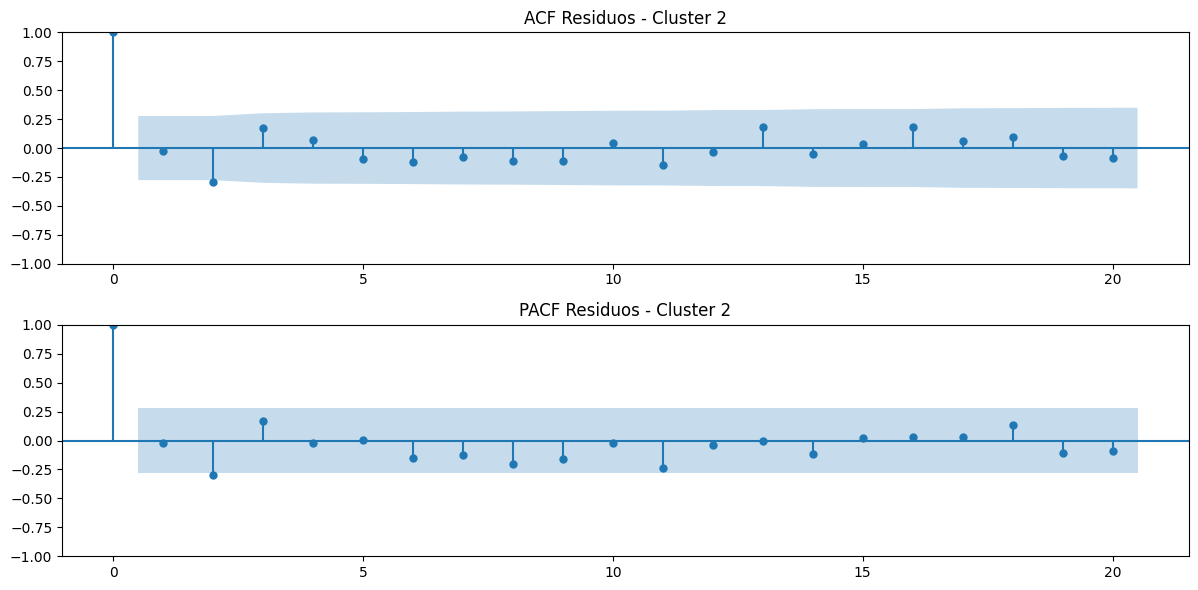

Autocorrelación de residuos (ACF):
ACF lags 1-5: [-0.02331835 -0.29652509  0.1704758   0.06863737 -0.09549823] (deberían ser cercanos a 0)


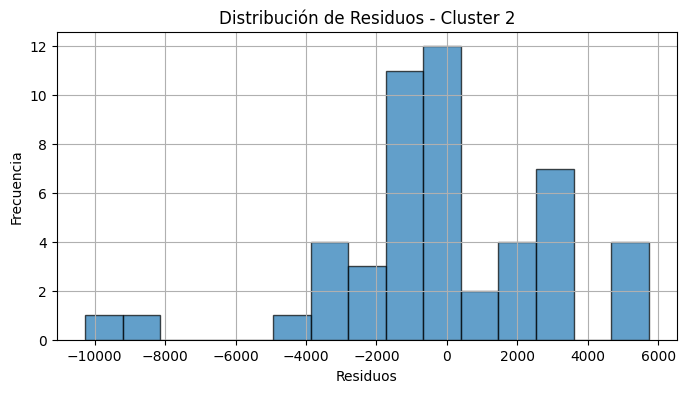

Evaluación del rendimiento para Cluster 2:
Mean Squared Error (MSE): 9826312.4374
Mean Absolute Error (MAE): 2269.8787
Root Mean Squared Error (RMSE): 3134.6950


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Crear un diccionario para almacenar evaluaciones por cluster
evaluaciones_modelo = {}

# Iterar sobre cada cluster
for cluster, modelo_fit in resultados_arima.items():
    # Obtener los residuos del modelo
    residuos = modelo_fit.resid

    # Gráficos y validación de supuestos
    print(f"\n--- Validación para el Cluster {cluster} ---")

    # Supuesto 1: Residuos estacionarios
    print("Prueba de estacionariedad (ADF Test) para los residuos:")
    adf_result = adfuller(residuos)
    print(f"ADF Statistic: {adf_result[0]:.4f}, p-value: {adf_result[1]:.4f}")
    if adf_result[1] < 0.05:
        print("Los residuos son estacionarios (rechazamos H0).")
    else:
        print("Los residuos no son estacionarios (no rechazamos H0).")

    # Gráficos de autocorrelación
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plot_acf(residuos, ax=plt.gca(), lags=20, title=f'ACF Residuos - Cluster {cluster}')
    plt.subplot(2, 1, 2)
    plot_pacf(residuos, ax=plt.gca(), lags=20, title=f'PACF Residuos - Cluster {cluster}')
    plt.tight_layout()
    plt.show()

    # Supuesto 2: Residuos independientes
    print("Autocorrelación de residuos (ACF):")
    acf_values = acf(residuos, nlags=20)
    print(f"ACF lags 1-5: {acf_values[1:6]} (deberían ser cercanos a 0)")

    # Supuesto 3: Residuos normalmente distribuidos
    plt.figure(figsize=(8, 4))
    plt.hist(residuos, bins=15, edgecolor='k', alpha=0.7)
    plt.title(f'Distribución de Residuos - Cluster {cluster}')
    plt.xlabel('Residuos')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

    # Evaluación del rendimiento del modelo
    predicciones = modelo_fit.predict(start=serie.index.min(), end=serie.index.max())
    mse = mean_squared_error(serie, predicciones)
    mae = mean_absolute_error(serie, predicciones)
    rmse = np.sqrt(mse)

    print(f"Evaluación del rendimiento para Cluster {cluster}:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

    # Almacenar resultados en el diccionario
    evaluaciones_modelo[cluster] = {
        "ADF Statistic": adf_result[0],
        "ADF p-value": adf_result[1],
        "ACF lags 1-5": acf_values[1:6],
        "MSE": mse,
        "MAE": mae,
        "RMSE": rmse
    }


In [ ]:
pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.4 MB/s eta 0:00:00


El siguiente código realiza tres cosas importantes:
1) En primera instancia define de forma automática cuáles son los mejores parámetros para la implementacion del modelo ARIMA por cluster. Ya que al primera implementacion habia sido realizada mediante parámetros ingresados de forma manual.
2) En segunda instancia se aplica el indicador MAPE a cada cluster para medir su rendimiento en cuanto a cómo se ajustan la predición con los valores reales. Con ello se llega a la conclusión de que para el cluster 0 el modelo acierta el 91% de las veces, para el cluster 1 el modelo acierta el 88% de las veces y finalmente para el cluster 2 91% de las veces, estos quiere decir que en genral nuestro modelo presenta un porcentaje de fallo relativamente bajo para cada cluster, pero que el fallo tiende a ser más alto para los países pertenecientes al cluster 1.

3) Junto con el MAPE se obtiene la Señal de Rastreo, el cual es un indicador de qué tan sub o sobre estimados son los datos de nuestra base de datos por el modelo ARIMA, es decir, cual es la calidad de la predicción realizada. Consiguiendo así que la Señal de Rastreo del cluster 0 es 3.51, para el cluster 1 es de 2.20 y para el cluster 2 es 2.16. Se puede ver de forma gráfica que para el cluster 1 los valores de la señal de rastreo se mueven entre -4 y 4 esto indica que el modelo es razonablemente preciso. Para el cluster 0 y 2 se puede ver una especies de pico entre los años 2003 al 2015 lo cual indica que los valores tienden a ser subpredecir, en otras palabras las predicion tiende a estar por debajo de los valores reales consistentemente.

Buscando las razones detrás de este fenómeno, se puede explicar que estos valores se vieron afectados porque entre 2003 y 2015, España y Grecia enfrentaron importantes transformaciones económicas. España vivió un auge económico hasta 2008, impulsado por una burbuja inmobiliaria y un fuerte crecimiento del sector construcción. Sin embargo, el estallido de la burbuja y la crisis financiera global llevaron al colapso bancario, desempleo masivo (25% en 2012) y severas políticas de austeridad tras el rescate europeo. Por su parte, Grecia disfrutó de un crecimiento inicial gracias a su acceso a financiamiento barato tras unirse al euro, pero acumuló una enorme deuda pública. En 2009, se descubrió que había maquillado sus cuentas fiscales, lo que desató una crisis de confianza que culminó en tres rescates internacionales y medidas de austeridad extremas. Ambos países sufrieron tensiones sociales, alta deuda y una lenta recuperación posterior.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=875.798, Time=0.77 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=872.804, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=871.267, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=871.019, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=874.985, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=873.291, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=872.942, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=875.111, Time=0.44 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=871.686, Time=0.10 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 2.399 seconds
Mejores parámetros para el Cluster 0: (0, 1, 1)

--- Métricas para el Cluster 0 ---
MAPE: 9.43%
Señal de Rastreo: 3.51


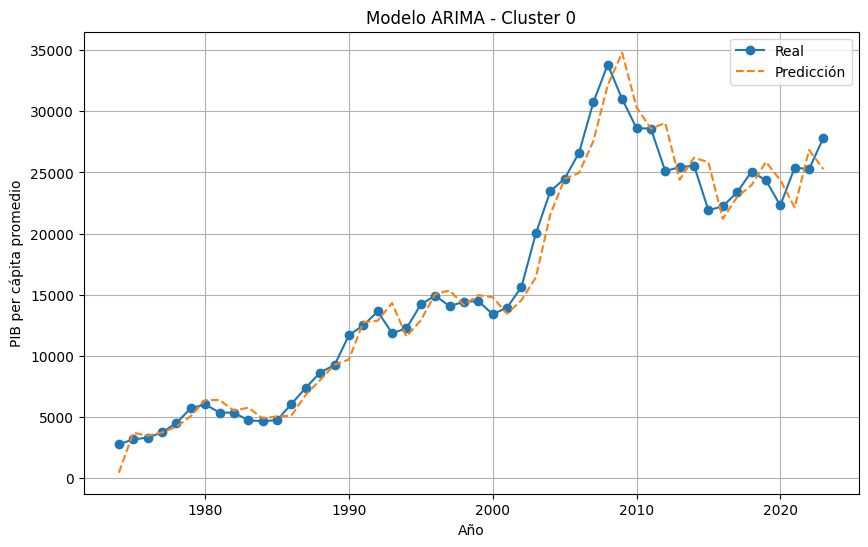

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=774.888, Time=1.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=771.369, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=769.308, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=770.108, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=773.290, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=770.933, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=771.026, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=772.888, Time=0.61 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=769.390, Time=0.05 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 2.855 seconds
Mejores parámetros para el Cluster 1: (1, 1, 0)

--- Métricas para el Cluster 1 ---
MAPE: 12.02%
Señal de Rastreo: 2.20


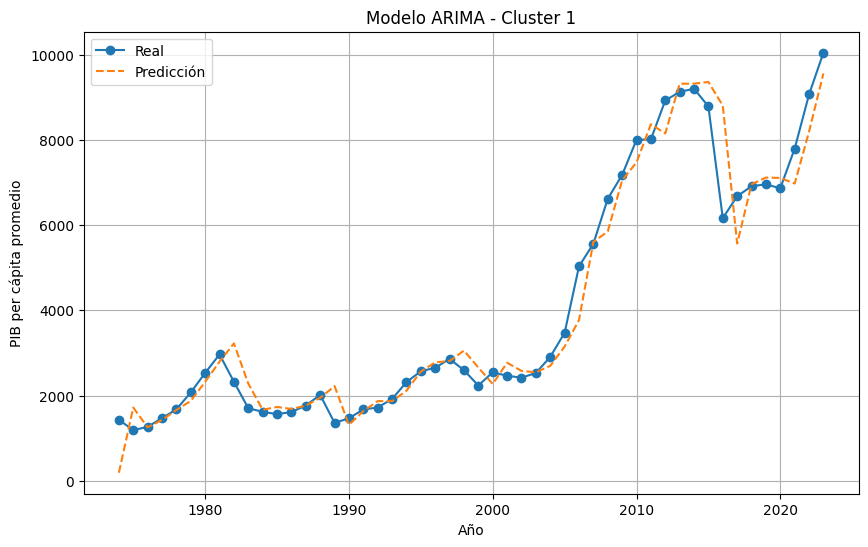

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=928.619, Time=1.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=927.082, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=929.092, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=929.253, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=930.636, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=930.881, Time=1.83 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 3.415 seconds
Mejores parámetros para el Cluster 2: (0, 1, 0)

--- Métricas para el Cluster 2 ---
MAPE: 8.75%
Señal de Rastreo: 2.16


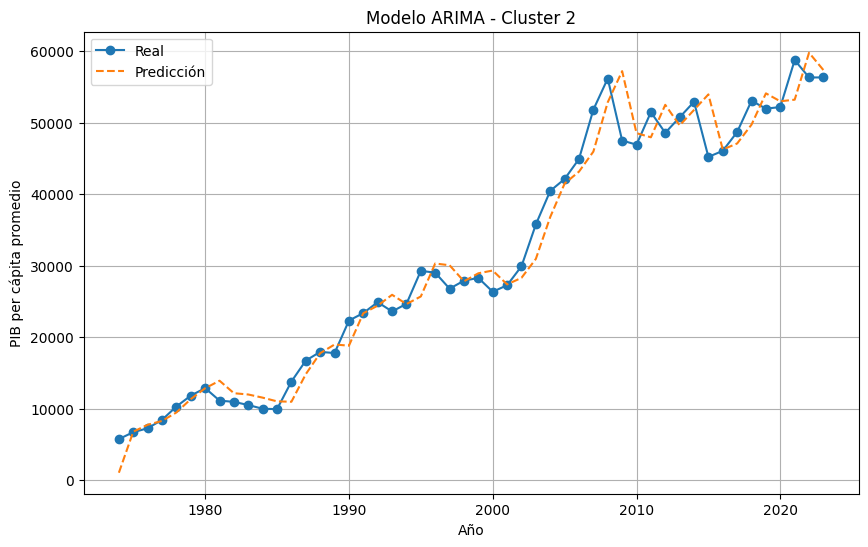

In [ ]:
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error

# Agrupar por año y cluster
serie_tiempo = dataset.groupby(['Año', 'Cluster'])['PIB per capita'].median().reset_index()

# Crear un diccionario para almacenar los resultados de los modelos ARIMA por cluster
resultados_arima = {}

# Iterar sobre cada cluster
for cluster in serie_tiempo['Cluster'].unique():
    # Filtrar los datos del cluster
    datos_cluster = serie_tiempo[serie_tiempo['Cluster'] == cluster]

    # Crear una serie de tiempo con índice consecutivo
    serie = datos_cluster.set_index('Año')['PIB per capita']

    # Verificar y completar años faltantes con interpolación
    serie = serie.reindex(range(serie.index.min(), serie.index.max() + 1), fill_value=None)
    serie = serie.interpolate()  # Interpolar valores faltantes si es necesario

    # Convertir el índice numérico a formato de fecha y especificar la frecuencia
    serie.index = pd.date_range(start=str(serie.index.min()), end=str(serie.index.max()), freq='YS')

    try:
        # Ajustar el modelo ARIMA automáticamente
        modelo_auto = auto_arima(serie, seasonal=False, stepwise=True, trace=True)
        print(f"Mejores parámetros para el Cluster {cluster}: {modelo_auto.order}")

        # Almacenar los resultados en el diccionario
        resultados_arima[cluster] = modelo_auto

        # Predicciones dentro de la muestra
        predicciones = modelo_auto.predict_in_sample()

        # Calcular el MAPE
        mape = np.mean(np.abs((serie - predicciones) / serie)) * 100

        # Calcular la Señal de Rastreo
        residuos = serie - predicciones
        suma_residuos = residuos.sum()
        mae = mean_absolute_error(serie, predicciones)
        tracking_signal = suma_residuos / mae if mae != 0 else np.nan  # Evitar división por cero

        # Imprimir las métricas de evaluación
        print(f"\n--- Métricas para el Cluster {cluster} ---")
        print(f"MAPE: {mape:.2f}%")
        print(f"Señal de Rastreo: {tracking_signal:.2f}")

        # Graficar resultados
        plt.figure(figsize=(10, 6))
        plt.plot(serie.index, serie, label='Real', marker='o')
        plt.plot(serie.index, predicciones, label='Predicción', linestyle='--')
        plt.title(f'Modelo ARIMA - Cluster {cluster}')
        plt.xlabel('Año')
        plt.ylabel('PIB per cápita promedio')
        plt.legend()
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"Error al ajustar el modelo para el cluster {cluster}: {e}")



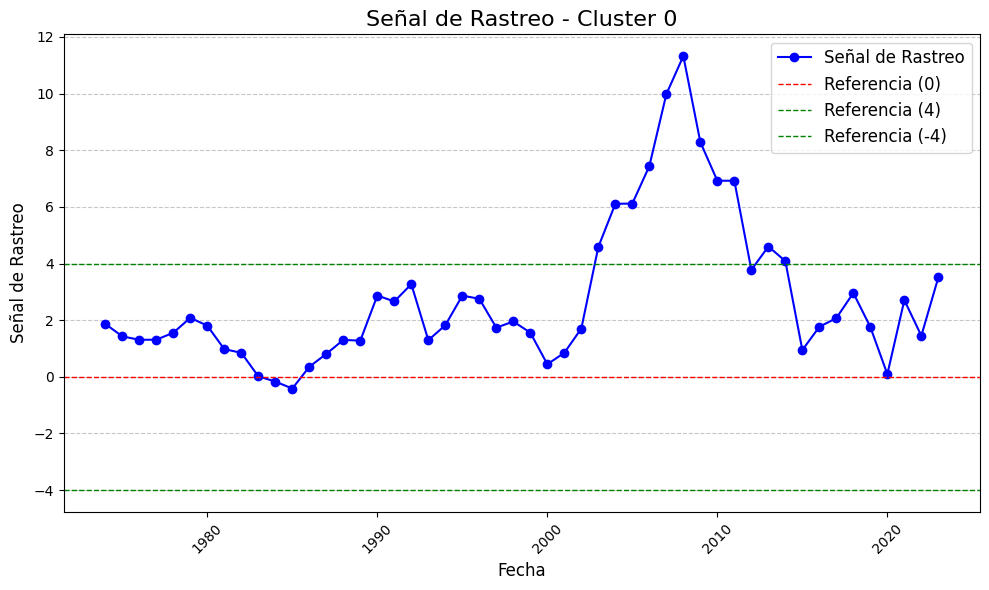

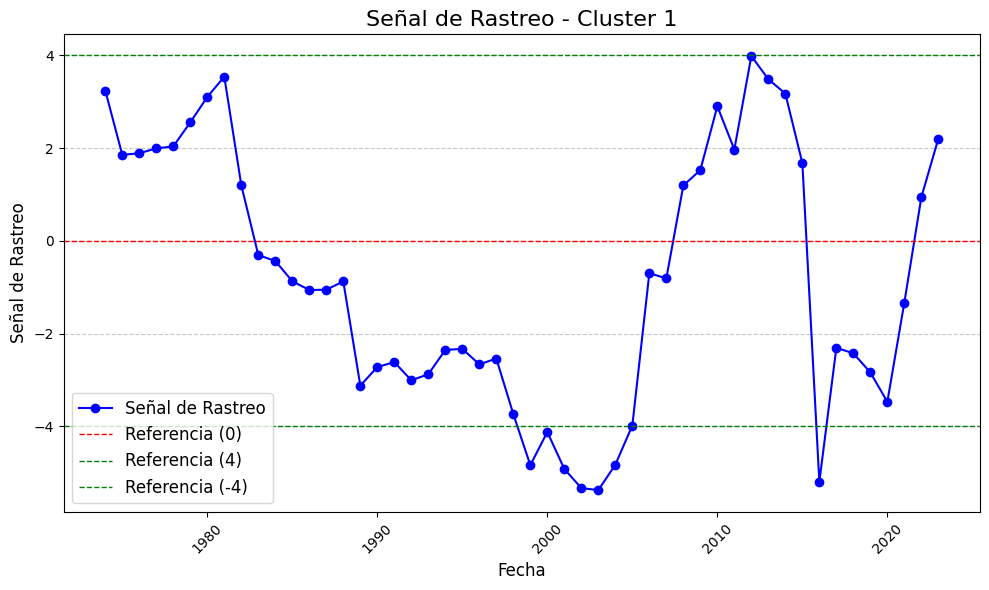

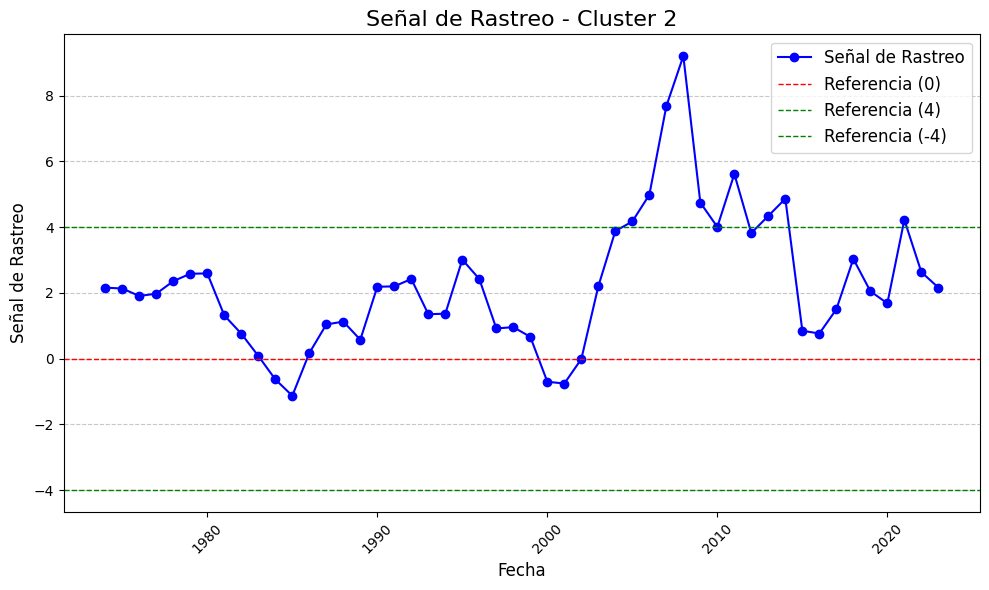

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Crear un diccionario para almacenar los resultados
resultados_signal_tracking = {}

# Iterar sobre cada cluster
for cluster in resultados_arima.keys():
    try:
        # Obtener la serie real y las predicciones del modelo ARIMA
        modelo = resultados_arima[cluster]
        serie = serie_tiempo[serie_tiempo['Cluster'] == cluster].set_index('Año')['PIB per capita']

        # Generar predicciones
        predicciones = modelo.predict_in_sample()

        # Calcular los errores
        errores = serie.values - predicciones

        # Calcular la Media Absoluta del Error (MAD)
        mad = mean_absolute_error(serie, predicciones)

        # Calcular la señal de rastreo acumulada
        signal_tracking = (errores.cumsum()) / mad

        # Almacenar en un DataFrame con fechas
        tracking_df = pd.DataFrame({
            'Fecha': serie.index,
            'Signal_Tracking': signal_tracking
        }).set_index('Fecha')

        # Guardar en el diccionario
        resultados_signal_tracking[cluster] = tracking_df

        # Graficar señal de rastreo
        plt.figure(figsize=(10, 6))
        plt.plot(tracking_df.index, tracking_df['Signal_Tracking'], marker='o', label='Señal de Rastreo', color='blue')
        plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Referencia (0)')
        plt.axhline(4, color='green', linestyle='--', linewidth=1, label='Referencia (4)')
        plt.axhline(-4, color='green', linestyle='--', linewidth=1, label='Referencia (-4)')
        plt.title(f'Señal de Rastreo - Cluster {cluster}', fontsize=16)
        plt.xlabel('Fecha', fontsize=12)
        plt.ylabel('Señal de Rastreo', fontsize=12)
        plt.legend(fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.xticks(fontsize=10, rotation=45)
        plt.yticks(fontsize=10)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error al calcular la señal de rastreo para el cluster {cluster}: {e}")




Mediante el siguiente código lo que realizamos es una descomoposición de las series de tiempo de cada cluster para obtener por separado la estacionalidad, la tendencia y el ruido.
Con ello se concluye que efectivamente, los cluster realizados son estacionarios, que presentan una tendencia positiva pero debido a que el ruido blanco tanto en el cluster 1 como el 2 presentan una especie de patron se puede decir que nuestro modelo no logra capturar en su totalidad la información de los datos y que podría mejorarse mediante un mayor ajuste al los parametros o podría ser necesaria la implementación de otro modelo.

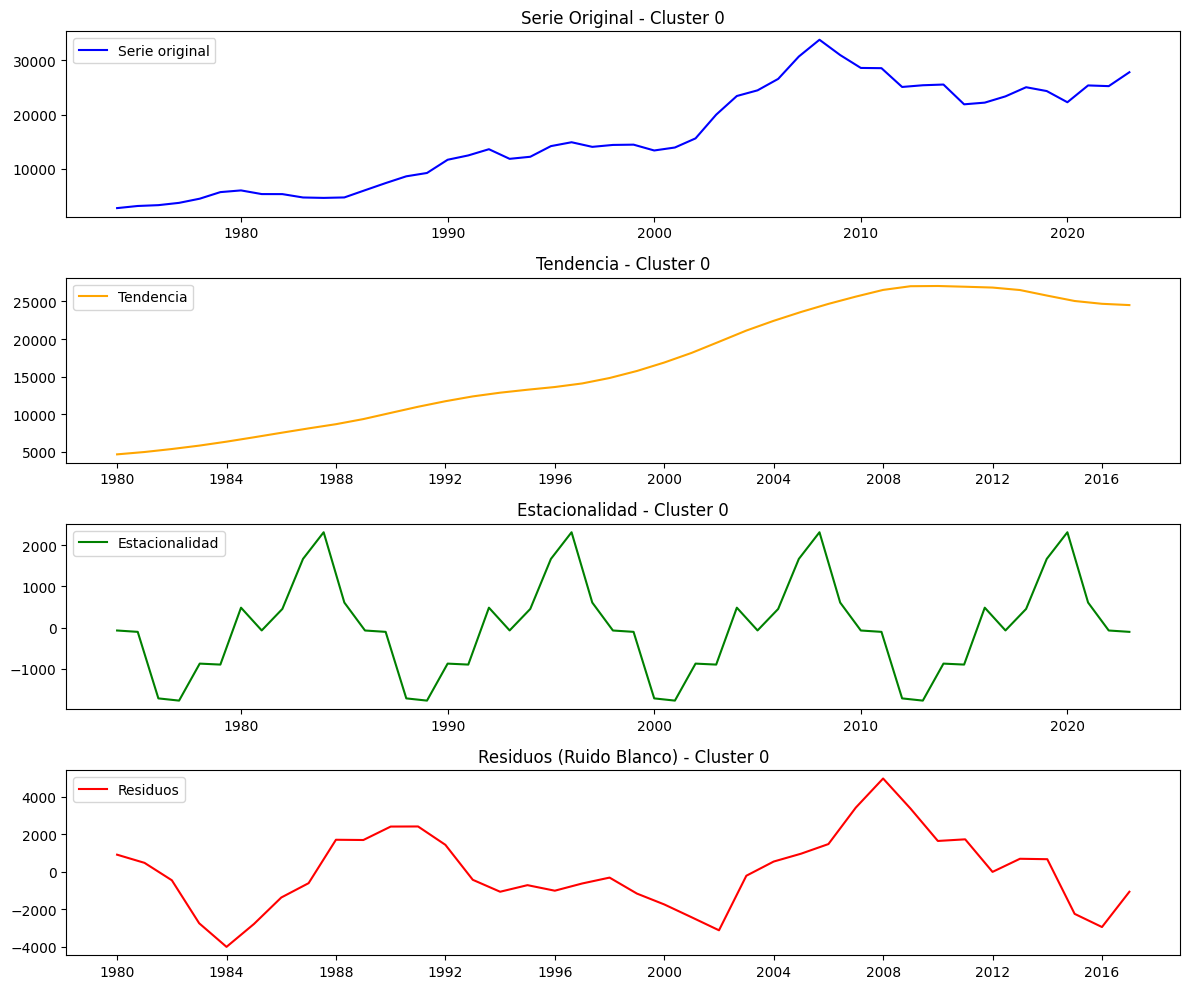

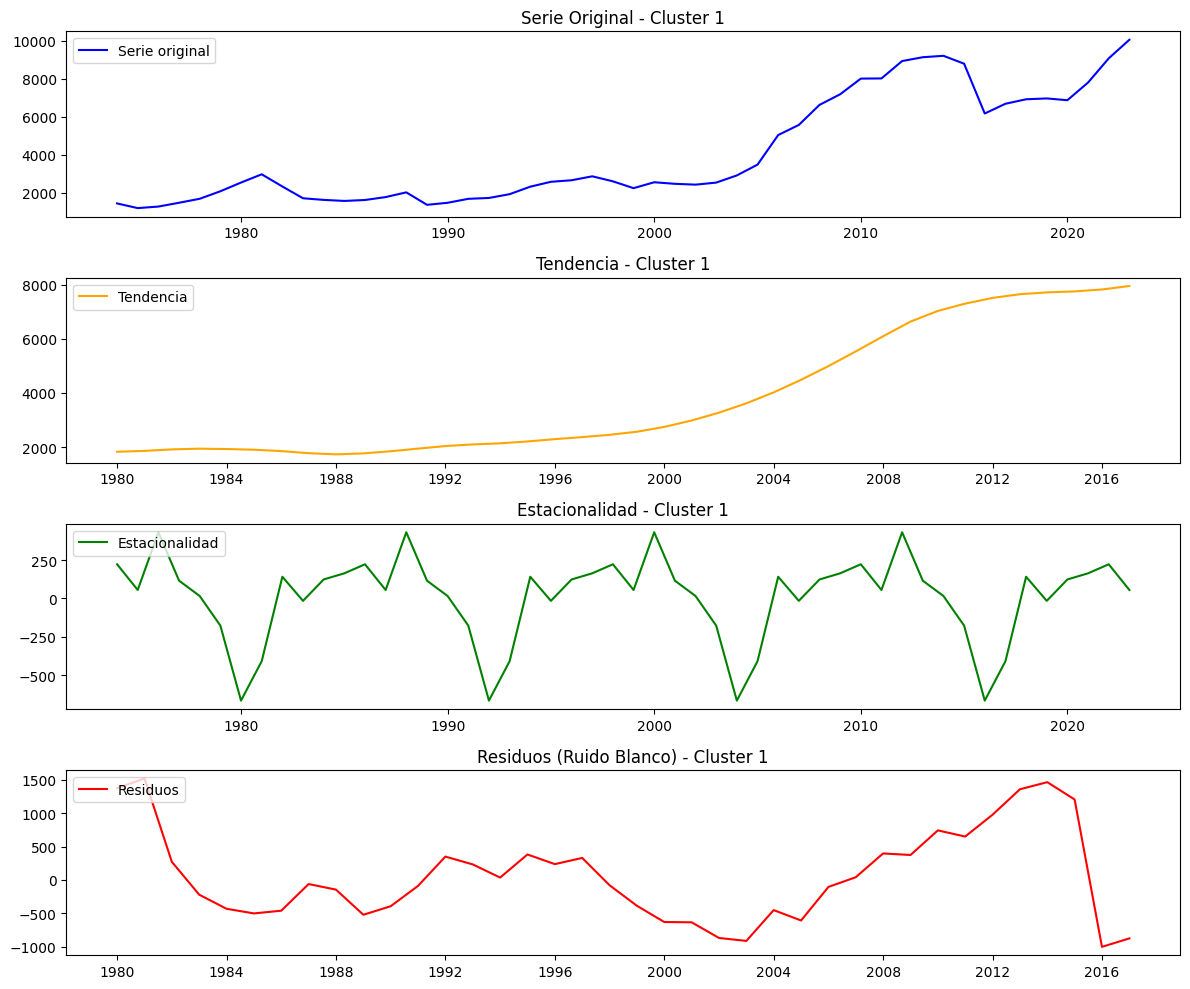

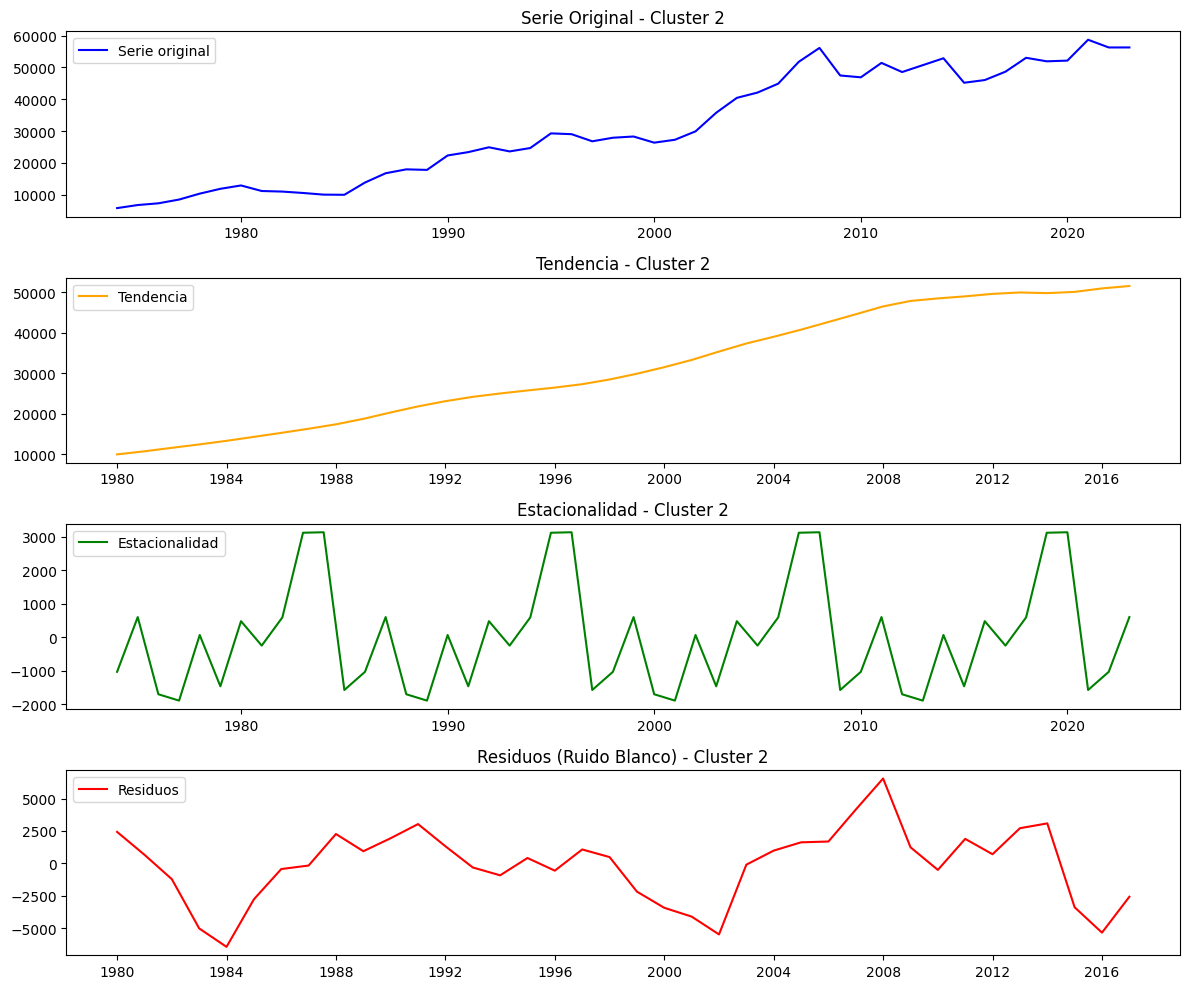

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Agrupar por año y cluster
serie_tiempo = dataset.groupby(['Año', 'Cluster'])['PIB per capita'].median().reset_index()

# Iterar sobre cada cluster
for cluster in serie_tiempo['Cluster'].unique():
    # Filtrar los datos del cluster
    datos_cluster = serie_tiempo[serie_tiempo['Cluster'] == cluster]

    # Crear una serie de tiempo con índice consecutivo
    serie = datos_cluster.set_index('Año')['PIB per capita']

    # Verificar y completar años faltantes con interpolación
    serie = serie.reindex(range(serie.index.min(), serie.index.max() + 1), fill_value=None)
    serie = serie.interpolate()  # Interpolar valores faltantes si es necesario

    # Convertir el índice numérico a formato de fecha y especificar la frecuencia
    serie.index = pd.date_range(start=str(serie.index.min()), end=str(serie.index.max()), freq='YS')

    try:
        # Descomponer la serie de tiempo en componentes
        descomposicion = seasonal_decompose(serie, model='additive', period=12)

        # Extraer componentes
        tendencia = descomposicion.trend
        estacionalidad = descomposicion.seasonal
        residuos = descomposicion.resid

        # Graficar los componentes
        plt.figure(figsize=(12, 10))

        plt.subplot(4, 1, 1)
        plt.plot(serie, label='Serie original', color='blue')
        plt.legend(loc='upper left')
        plt.title(f'Serie Original - Cluster {cluster}')

        plt.subplot(4, 1, 2)
        plt.plot(tendencia, label='Tendencia', color='orange')
        plt.legend(loc='upper left')
        plt.title(f'Tendencia - Cluster {cluster}')

        plt.subplot(4, 1, 3)
        plt.plot(estacionalidad, label='Estacionalidad', color='green')
        plt.legend(loc='upper left')
        plt.title(f'Estacionalidad - Cluster {cluster}')

        plt.subplot(4, 1, 4)
        plt.plot(residuos, label='Residuos', color='red')
        plt.legend(loc='upper left')
        plt.title(f'Residuos (Ruido Blanco) - Cluster {cluster}')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error al descomponer la serie para el cluster {cluster}: {e}")


El siguiente código está confeccionado para predecir los valores de PIB per cápita promedio de cada cluster en los siguientes dos años, con un intervalo de confianza del 90% representado como bandas en cada gráfico.
Se obtuvo que para el cluster 0 en el año 2024 el valor es de 29066 y para 2025 es de 29528 dolares. Para el cluster 1 el valor para el año 2024 es 10455 mientras que para el 2025 es de 10707 dolares y finalmente para el cluster 2 para 2024 se predijo un valor de 57337 y 2025 un valor de 58369 dolares.


<ipython-input-54-5ed8ace8cb4b>:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predicciones_futuras_confianza = pd.concat([predicciones_futuras_confianza, predicciones_cluster], ignore_index=True)


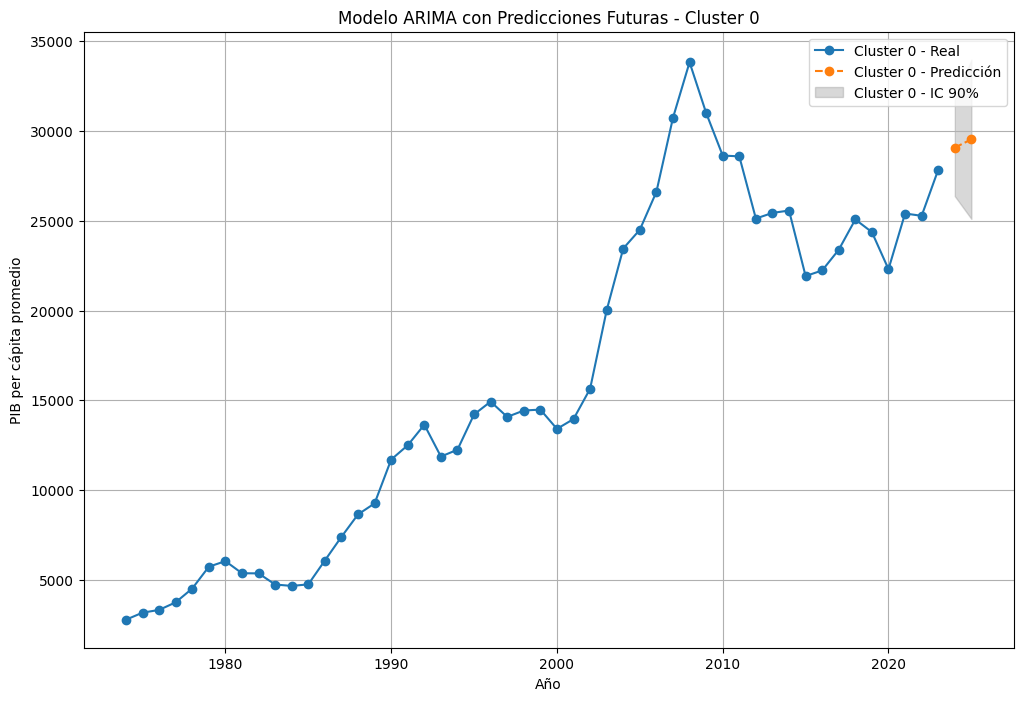

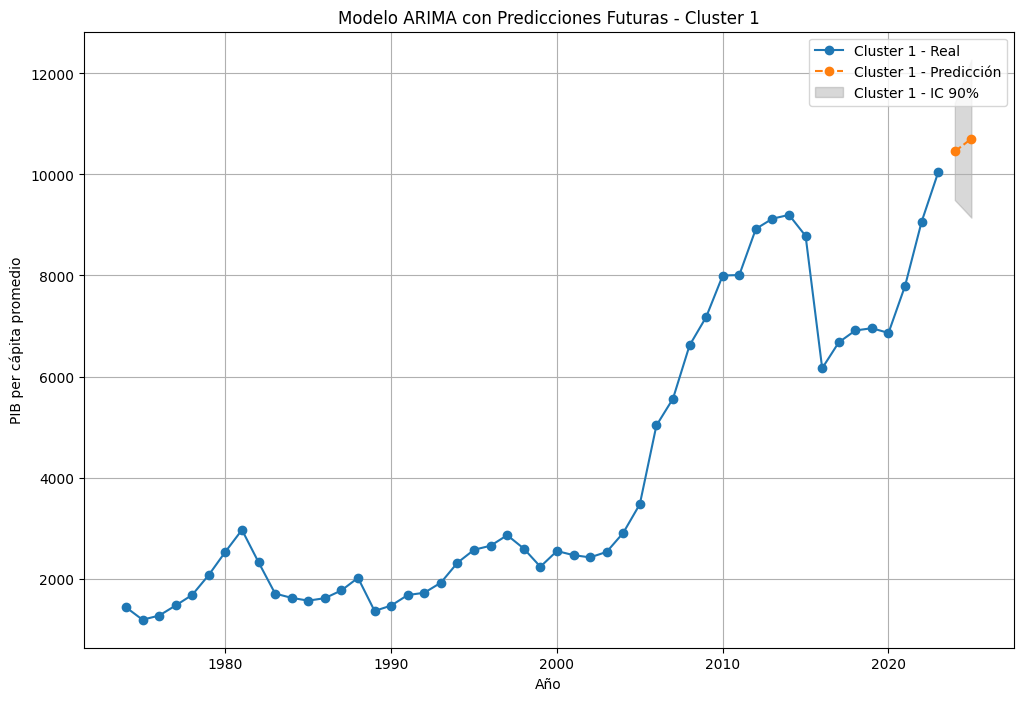

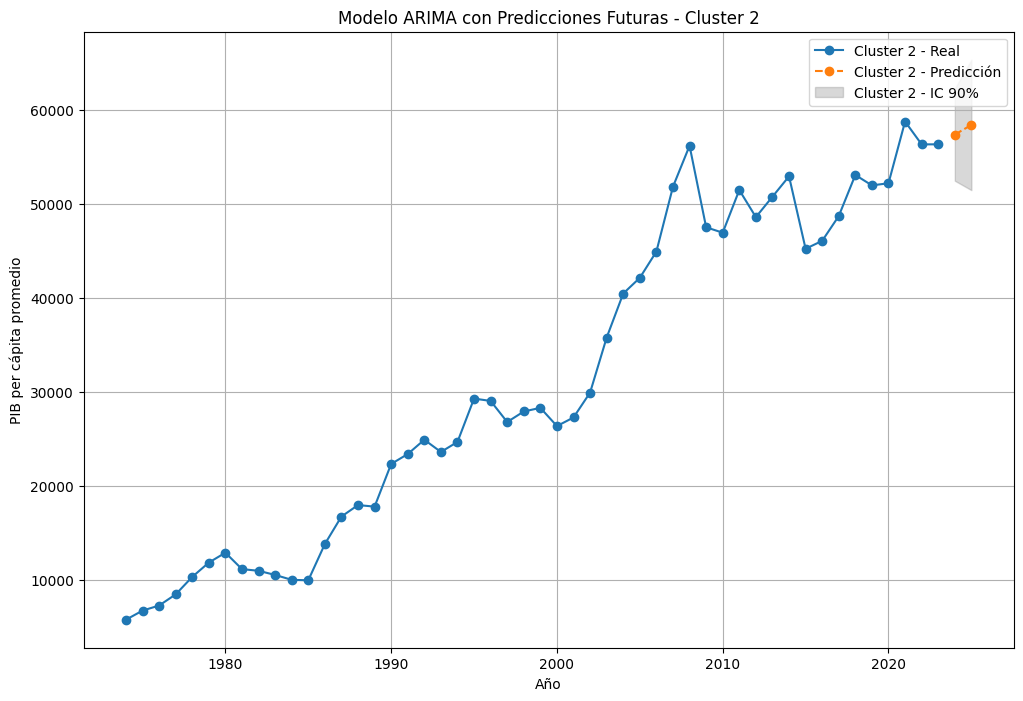


Predicciones con intervalos de confianza para los próximos 2 años por cluster:
  Cluster   Año  PIB per capita Predicho  Confianza Inferior  \
0       0  2024             29066.168037        26364.349386   
1       0  2025             29528.801069        25098.230207   
2       1  2024             10455.086600         9493.053416   
3       1  2025             10707.615380         9144.611642   
4       2  2024             57337.320650        52432.799044   
5       2  2025             58369.391100        51433.350128   

   Confianza Superior  
0        31767.986688  
1        33959.371931  
2        11417.119785  
3        12270.619119  
4        62241.842257  
5        65305.432073  


In [ ]:
# Crear un DataFrame para almacenar las predicciones a futuro con intervalos de confianza
predicciones_futuras_confianza = pd.DataFrame(columns=['Cluster', 'Año', 'PIB per capita Predicho', 'Confianza Inferior', 'Confianza Superior'])

# Iterar sobre cada cluster en los resultados de ARIMA
for cluster, modelo_auto in resultados_arima.items():
    try:
        # Definir el número de años a predecir
        pasos_futuros = 2

        # Generar predicciones a futuro con intervalos de confianza
        predicciones, conf_int = modelo_auto.predict(n_periods=pasos_futuros, return_conf_int=True, alpha=0.1)

        # Crear las fechas correspondientes a las predicciones
        ultimo_anio = serie_tiempo[serie_tiempo['Cluster'] == cluster]['Año'].max()
        anios_futuros = [ultimo_anio + i for i in range(1, pasos_futuros + 1)]

        # Almacenar las predicciones y los intervalos de confianza en el DataFrame
        predicciones_cluster = pd.DataFrame({
            'Cluster': [cluster] * pasos_futuros,
            'Año': anios_futuros,
            'PIB per capita Predicho': predicciones,
            'Confianza Inferior': conf_int[:, 0],
            'Confianza Superior': conf_int[:, 1]
        })

        predicciones_futuras_confianza = pd.concat([predicciones_futuras_confianza, predicciones_cluster], ignore_index=True)

        # Graficar serie completa (histórica y predicción)
        plt.figure(figsize=(12, 8))

        # Serie histórica
        datos_historicos = serie_tiempo[serie_tiempo['Cluster'] == cluster]
        plt.plot(datos_historicos['Año'], datos_historicos['PIB per capita'], marker='o', label=f'Cluster {cluster} - Real')

        # Predicciones
        plt.plot(anios_futuros, predicciones, marker='o', linestyle='--', label=f'Cluster {cluster} - Predicción')

        # Intervalos de confianza
        plt.fill_between(anios_futuros, conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.3, label=f'Cluster {cluster} - IC 90%')

        plt.title(f'Modelo ARIMA con Predicciones Futuras - Cluster {cluster}')
        plt.xlabel('Año')
        plt.ylabel('PIB per cápita promedio')
        plt.legend()
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"Error al predecir para el cluster {cluster}: {e}")

# Mostrar el DataFrame con las predicciones y sus intervalos de confianza
print("\nPredicciones con intervalos de confianza para los próximos 2 años por cluster:")
print(predicciones_futuras_confianza)



# 6. Conclusión

Una vez analizado los datos nos damos cuenta de que el modelo no es tan preciso como es deseado, sin embargo es una herramienta útil a la hora de poder predecir cuales van a ser los resultados a futuro. Es necesario seguir generando modificaciones tanto a la base de datos, como al modelo de forma de aumentar esta presición.

Para agregar más precisión a nuestro modelo, es necesario un trabajo más exahustivo, requieriendo más tiempo del disponible y un aumento en el nivel de conocimiento para poder trabajar de buena forma las series de tiempo. Sin embargo algunas de las cosas que podemos rescatar para realizar tal vez en un futuro una mejora a este proyecto, es el aumento en la cantidad de países a analizar, un mejor pre procesamiento de la data, mejorar los parámetros de los clusters y la exploración de otros métodos de series de tiempo.

Como grupo creemos que este trabajo ha presentado muchos desafíos y oportunidad de crecimiento, ya que el adquirir conocimientos fuera de los que son expresados en la sala de clases, nos permite desarrollarnos y ampliar habilidades autodidactas. A pesar de los desafíos presentados a la hora de trabajar con series de tiempo, tópico no visto en clases, se ha llegado a un resultado satisfactorio, que gracias a una visión vista en la asignatura como son los modelos de clusters, permitieron la realización de este trabajo de una forma más abordable.

Además el proceso de cambiar de enfoque durante el trayecto del proyecto, nos da la sabidura y la resiliencia para poder adaptarnos a los cambios que se van presentando a lo largo del camino. Habilidad que nos será mucha utilidad en nuestra vida tanto laboral como personal.

